House Price Prediction Problem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data sets
train=pd.read_csv("train.csv")
train.head(30)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5          Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7          Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
10         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
11         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
12         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
13         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
15         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
16         Lvl    AllPub  ...        0    NaN    NaN        Shed     700   
17         Lvl    AllPub  ...        0    NaN    NaN        Shed     500   
18         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
19         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
20         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
21    

In [162]:
train.shape

(1460, 81)

In [163]:
train['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

## Data Analysis

## 1. Types of Variables( Continuous, discreate, categorical)

In [164]:
# Categorical features
cat_feat=[x for x in train.columns if train[x].dtypes=='O']

In [165]:
cat_feat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [166]:
train[cat_feat]

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...   ...      ...         ...       ...       ...       ...   
1455       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1  ... GarageType GarageFinish GarageQual  \
0         CollgCr       Norm  ...     Attchd          RFn         TA   
1         Veenker      Feedr  ...     Attchd          RFn         TA   
2         CollgCr       Norm  ...     Attchd          RFn         TA   
3         Crawfor       Norm  ...     Detchd          Unf         TA   
4         NoRidge       Norm  ...     Attchd          RFn         TA   
...           ...        ...  ...        ...          ...        ...   
1455      Gilbert       Norm  ...     Attchd          RFn         TA   
1456       NWAmes       Norm  ...     Attchd          Unf         TA   
1457      Crawfor       Norm  ...     Attchd          RFn         TA   
1458        NAmes       Norm  ...     Attchd          Unf         TA   
1459      Edwards       Norm  ...     Attchd          Fin         TA   

     GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0            TA          Y    NaN    NaN         NaN       WD        Normal  
1            TA          Y    NaN    NaN         NaN       WD        Normal  
2            TA          Y    NaN    NaN         NaN       WD        Normal  
3            TA          Y    NaN    NaN         NaN       WD       Abnorml  
4            TA          Y    NaN    NaN         NaN       WD        Normal  
...         ...        ...    ...    ...         ...      ...           ...  
1455         TA          Y    NaN    NaN         NaN       WD        Normal  
1456         TA          Y    NaN  MnPrv         NaN       WD        Normal  
1457         TA          Y    NaN  GdPrv        Shed       WD        Normal  
1458         TA          Y    NaN    NaN         NaN       WD        Normal  
1459         TA          Y    NaN    NaN         NaN       WD        Normal  

[1460 rows x 43 columns]

In [167]:
len(cat_feat)

43

In [168]:
#Discreate Variables
dis_feat=[y for y in train.columns if train[y].dtypes !='O' if len(train[y].unique())<25]

In [169]:
dis_feat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [170]:
train[dis_feat]

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0             60            7            5             0             1   
1             20            6            8             0             0   
2             60            7            5             0             1   
3             70            7            5             0             1   
4             60            8            5             0             1   
...          ...          ...          ...           ...           ...   
1455          60            6            5             0             0   
1456          20            6            6             0             1   
1457          70            7            9             0             0   
1458          20            5            6             0             1   
1459          20            5            6             0             1   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0                0         2         1             3             1   
1                1         2         0             3             1   
2                0         2         1             3             1   
3                0         1         0             3             1   
4                0         2         1             4             1   
...            ...       ...       ...           ...           ...   
1455             0         2         1             3             1   
1456             0         2         0             3             1   
1457             0         2         0             4             1   
1458             0         1         0             2             1   
1459             0         1         1             3             1   

      TotRmsAbvGrd  Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  \
0                8           0           2          0         0        0   
1                6           1           2          0         0        0   
2                6           1           2          0         0        0   
3                7           1           3          0         0        0   
4                9           1           3          0         0        0   
...            ...         ...         ...        ...       ...      ...   
1455             7           1           2          0         0        0   
1456             7           2           2          0         0        0   
1457             9           2           1          0         0     2500   
1458             5           0           1          0         0        0   
1459             6           0           1          0         0        0   

      MoSold  YrSold  
0          2    2008  
1          5    2007  
2          9    2008  
3          2    2006  
4         12    2008  
...      ...     ...  
1455       8    2007  
1456       2    2010  
1457       5    2010  
1458       4    2010  
1459       6    2008  

[1460 rows x 18 columns]

In [171]:
len(dis_feat)

18

In [172]:
#Continuous Variable
num_feat=[z for z in train.columns if train[z].dtypes !='O' if len(train[z].unique())>30]

In [173]:
num_feat

['Id',
 'LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [174]:
train[num_feat]

Id  LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
0        1         65.0     8450       2003          2003       196.0   
1        2         80.0     9600       1976          1976         0.0   
2        3         68.0    11250       2001          2002       162.0   
3        4         60.0     9550       1915          1970         0.0   
4        5         84.0    14260       2000          2000       350.0   
...    ...          ...      ...        ...           ...         ...   
1455  1456         62.0     7917       1999          2000         0.0   
1456  1457         85.0    13175       1978          1988       119.0   
1457  1458         66.0     9042       1941          2006         0.0   
1458  1459         68.0     9717       1950          1996         0.0   
1459  1460         75.0     9937       1965          1965         0.0   

      BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0            706           0        150          856       856       854   
1            978           0        284         1262      1262         0   
2            486           0        434          920       920       866   
3            216           0        540          756       961       756   
4            655           0        490         1145      1145      1053   
...          ...         ...        ...          ...       ...       ...   
1455           0           0        953          953       953       694   
1456         790         163        589         1542      2073         0   
1457         275           0        877         1152      1188      1152   
1458          49        1029          0         1078      1078         0   
1459         830         290        136         1256      1256         0   

      GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  \
0          1710       2003.0         548           0           61   
1          1262       1976.0         460         298            0   
2          1786       2001.0         608           0           42   
3          1717       1998.0         642           0           35   
4          2198       2000.0         836         192           84   
...         ...          ...         ...         ...          ...   
1455       1647       1999.0         460           0           40   
1456       2073       1978.0         500         349            0   
1457       2340       1941.0         252           0           60   
1458       1078       1950.0         240         366            0   
1459       1256       1965.0         276         736           68   

      EnclosedPorch  ScreenPorch  SalePrice  
0                 0            0     208500  
1                 0            0     181500  
2                 0            0     223500  
3               272            0     140000  
4                 0            0     250000  
...             ...          ...        ...  
1455              0            0     175000  
1456              0            0     210000  
1457              0            0     266500  
1458            112            0     142125  
1459              0            0     147500  

[1460 rows x 20 columns]

In [175]:
len(num_feat)

20

# 2.Analysis of Variables

## 2.1 Univariate analysis

## For Continuous Features

### Correlation Heatmap

In [176]:
# Correlation matrix
train[num_feat].corr()

Id  LotFrontage   LotArea  YearBuilt  YearRemodAdd  \
Id             1.000000    -0.010601 -0.033226  -0.012713     -0.021998   
LotFrontage   -0.010601     1.000000  0.426095   0.123349      0.088866   
LotArea       -0.033226     0.426095  1.000000   0.014228      0.013788   
YearBuilt     -0.012713     0.123349  0.014228   1.000000      0.592855   
YearRemodAdd  -0.021998     0.088866  0.013788   0.592855      1.000000   
MasVnrArea    -0.050298     0.193458  0.104160   0.315707      0.179618   
BsmtFinSF1    -0.005024     0.233633  0.214103   0.249503      0.128451   
BsmtFinSF2    -0.005968     0.049900  0.111170  -0.049107     -0.067759   
BsmtUnfSF     -0.007940     0.132644 -0.002618   0.149040      0.181133   
TotalBsmtSF   -0.015415     0.392075  0.260833   0.391452      0.291066   
1stFlrSF       0.010496     0.457181  0.299475   0.281986      0.240379   
2ndFlrSF       0.005590     0.080177  0.050986   0.010308      0.140024   
GrLivArea      0.008273     0.402797  0.263116   0.199010      0.287389   
GarageYrBlt    0.000072     0.070250 -0.024947   0.825667      0.642277   
GarageArea     0.017634     0.344997  0.180403   0.478954      0.371600   
WoodDeckSF    -0.029643     0.088521  0.171698   0.224880      0.205726   
OpenPorchSF   -0.000477     0.151972  0.084774   0.188686      0.226298   
EnclosedPorch  0.002889     0.010700 -0.018340  -0.387268     -0.193919   
ScreenPorch    0.001330     0.041383  0.043160  -0.050364     -0.038740   
SalePrice     -0.021917     0.351799  0.263843   0.522897      0.507101   

               MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
Id              -0.050298   -0.005024   -0.005968  -0.007940    -0.015415   
LotFrontage      0.193458    0.233633    0.049900   0.132644     0.392075   
LotArea          0.104160    0.214103    0.111170  -0.002618     0.260833   
YearBuilt        0.315707    0.249503   -0.049107   0.149040     0.391452   
YearRemodAdd     0.179618    0.128451   -0.067759   0.181133     0.291066   
MasVnrArea       1.000000    0.264736   -0.072319   0.114442     0.363936   
BsmtFinSF1       0.264736    1.000000   -0.050117  -0.495251     0.522396   
BsmtFinSF2      -0.072319   -0.050117    1.000000  -0.209294     0.104810   
BsmtUnfSF        0.114442   -0.495251   -0.209294   1.000000     0.415360   
TotalBsmtSF      0.363936    0.522396    0.104810   0.415360     1.000000   
1stFlrSF         0.344501    0.445863    0.097117   0.317987     0.819530   
2ndFlrSF         0.174561   -0.137079   -0.099260   0.004469    -0.174512   
GrLivArea        0.390857    0.208171   -0.009640   0.240257     0.454868   
GarageYrBlt      0.252691    0.153484   -0.088011   0.190708     0.322445   
GarageArea       0.373066    0.296970   -0.018227   0.183303     0.486665   
WoodDeckSF       0.159718    0.204306    0.067898  -0.005316     0.232019   
OpenPorchSF      0.125703    0.111761    0.003093   0.129005     0.247264   
EnclosedPorch   -0.110204   -0.102303    0.036543  -0.002538    -0.095478   
ScreenPorch      0.061466    0.062021    0.088871  -0.012579     0.084489   
SalePrice        0.477493    0.386420   -0.011378   0.214479     0.613581   

               1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  GarageArea  \
Id             0.010496  0.005590   0.008273     0.000072    0.017634   
LotFrontage    0.457181  0.080177   0.402797     0.070250    0.344997   
LotArea        0.299475  0.050986   0.263116    -0.024947    0.180403   
YearBuilt      0.281986  0.010308   0.199010     0.825667    0.478954   
YearRemodAdd   0.240379  0.140024   0.287389     0.642277    0.371600   
MasVnrArea     0.344501  0.174561   0.390857     0.252691    0.373066   
BsmtFinSF1     0.445863 -0.137079   0.208171     0.153484    0.296970   
BsmtFinSF2     0.097117 -0.099260  -0.009640    -0.088011   -0.018227   
BsmtUnfSF      0.317987  0.004469   0.240257     0.190708    0.183303   
TotalBsmtSF    0.819530 -0.174512   0.454868     0.322445    0.486665   
1stFlrSF       1.000000 

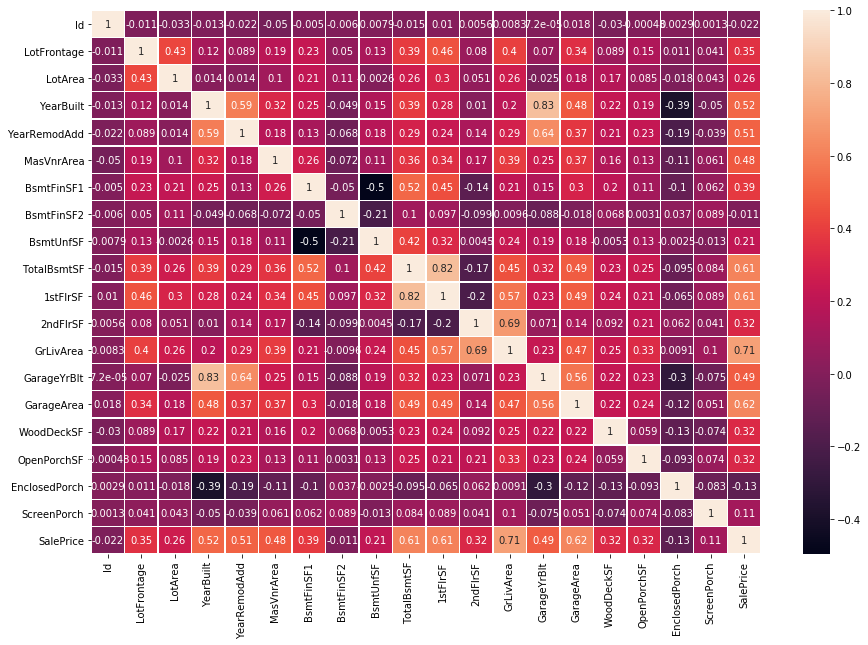

In [177]:
plt.figure(figsize=(15,10))
sns.heatmap(train[num_feat].corr(),annot=True, linewidths=0.3)

### Scatter plot

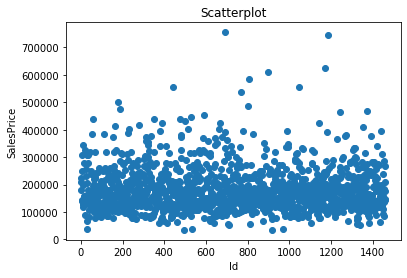

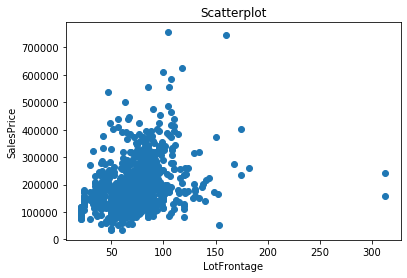

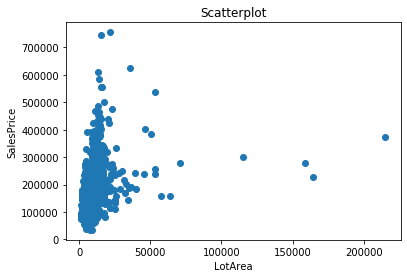

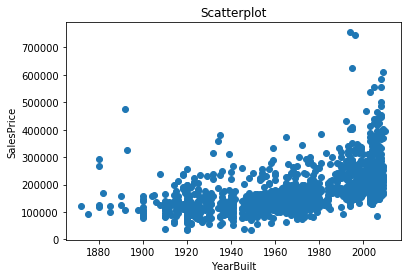

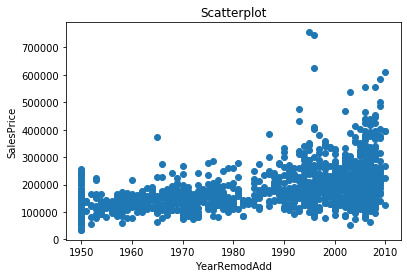

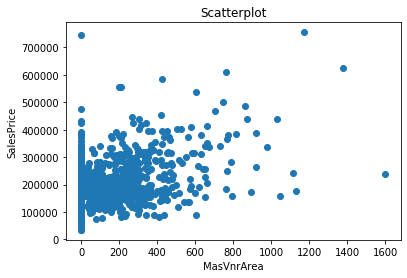

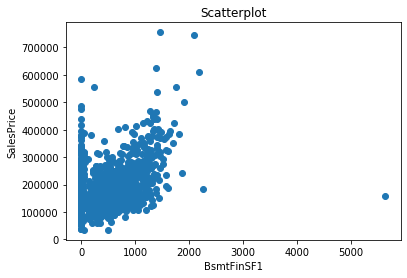

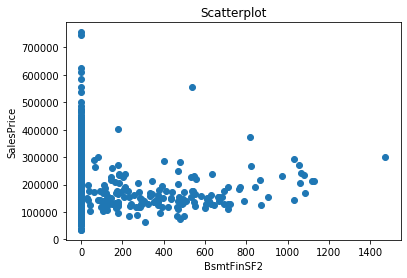

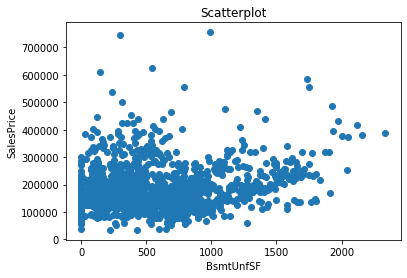

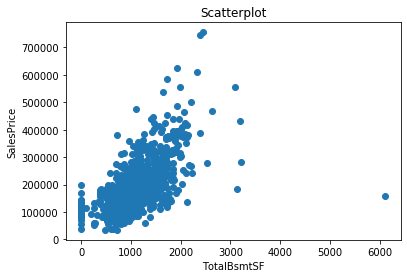

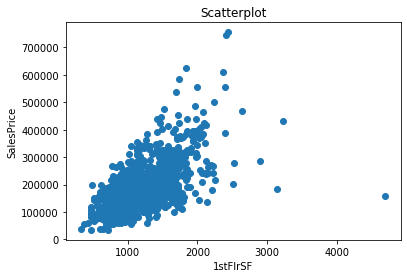

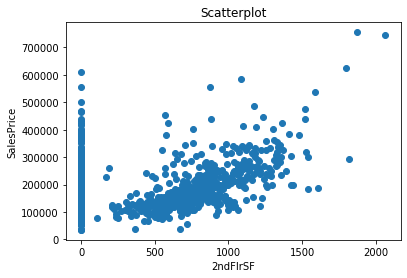

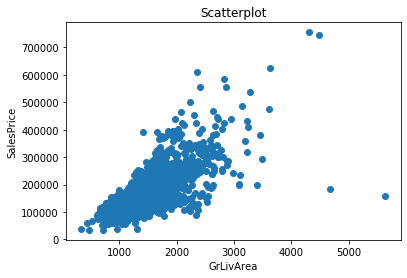

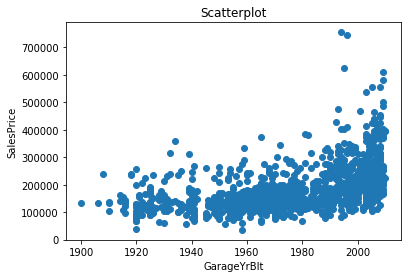

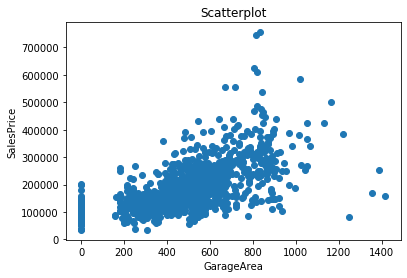

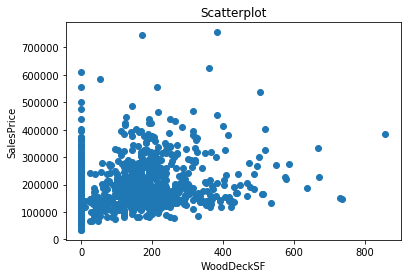

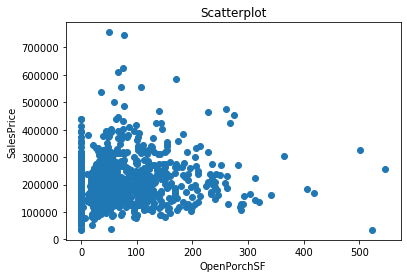

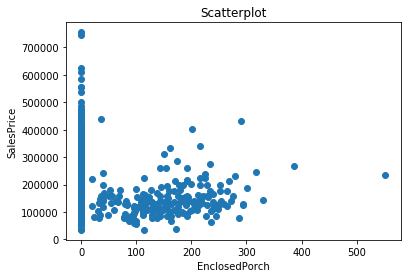

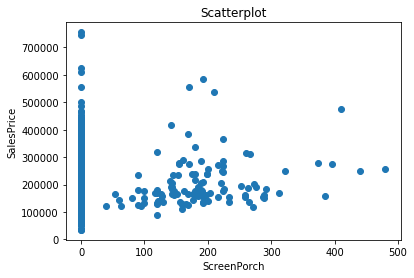

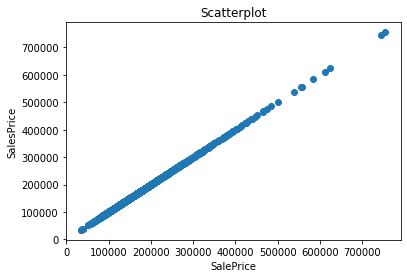

In [178]:
# Scatter plot
for feat in num_feat:
    plt.scatter(train[feat],train['SalePrice'])
    plt.xlabel(feat)
    plt.ylabel('SalesPrice')
    plt.title('Scatterplot')
    plt.show()

### Boxplot

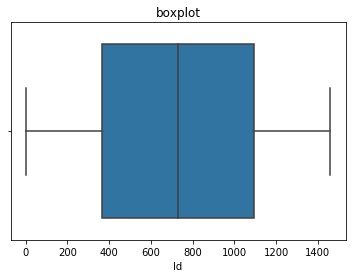

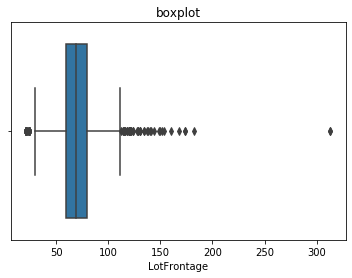

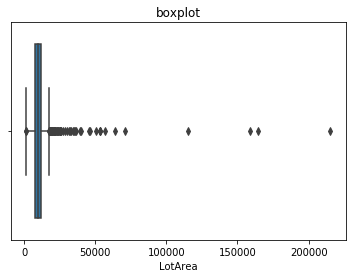

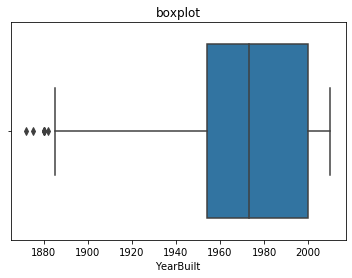

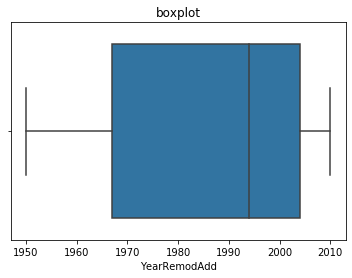

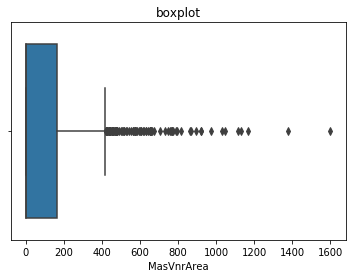

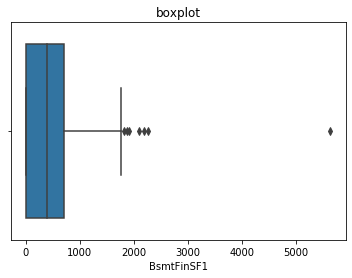

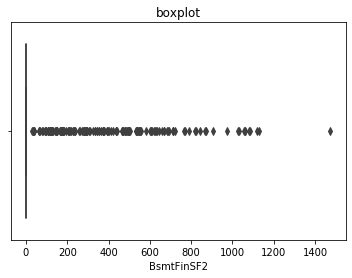

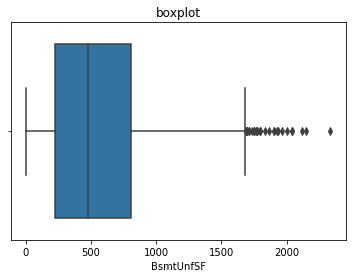

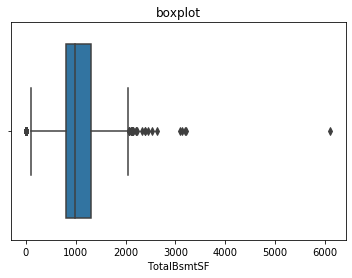

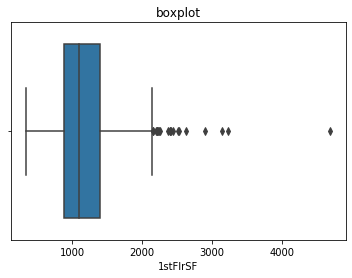

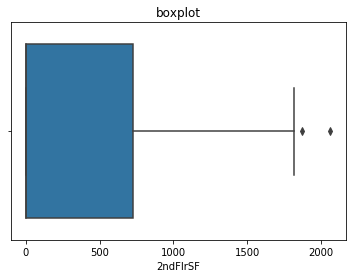

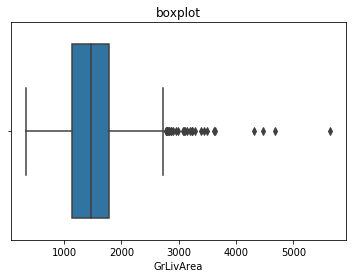

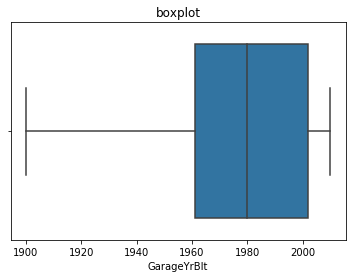

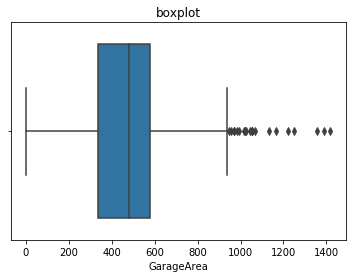

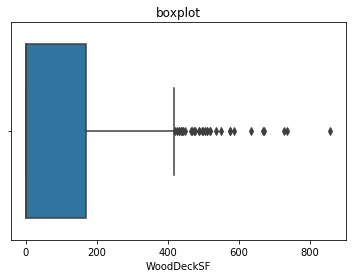

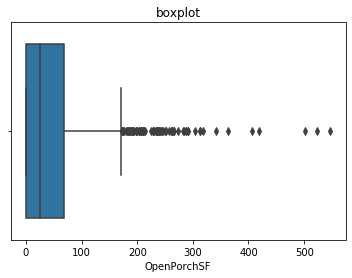

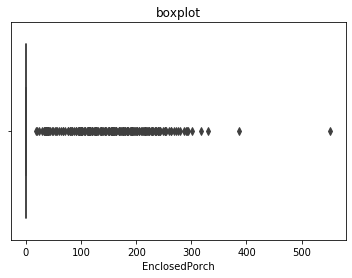

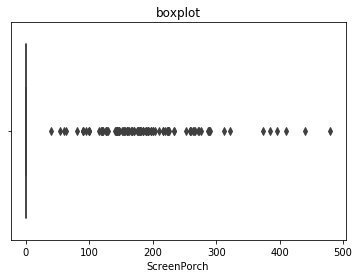

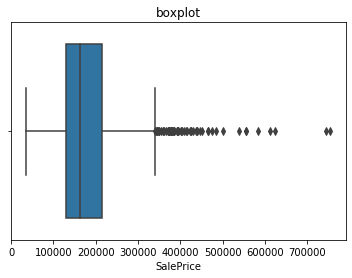

In [55]:
#Boxplot
for feat in num_feat:
    sns.boxplot(train[feat])
    plt.xlabel(feat)
    plt.title('boxplot')
    plt.show()

### Distribution plot

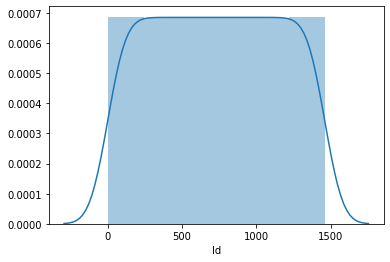

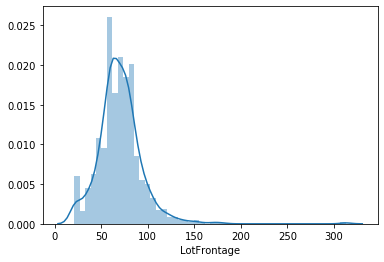

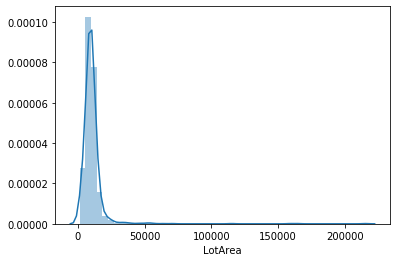

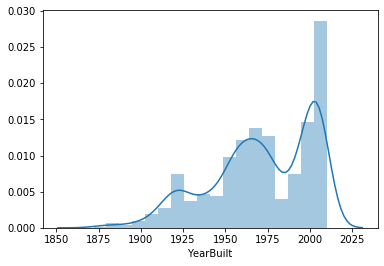

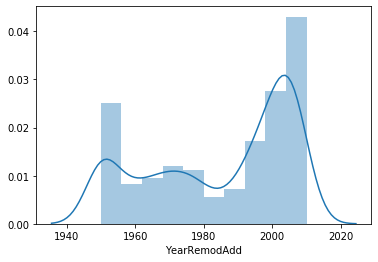

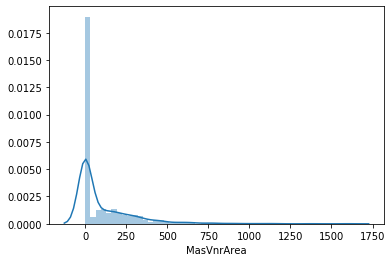

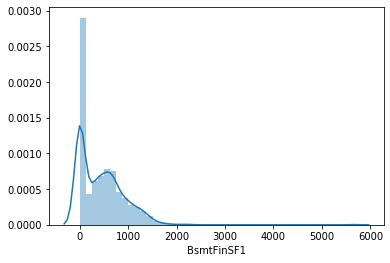

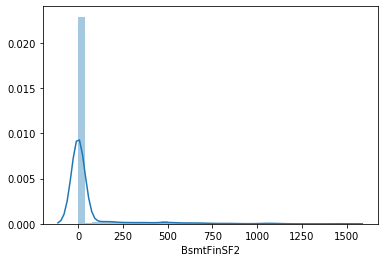

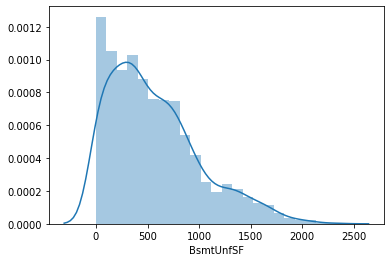

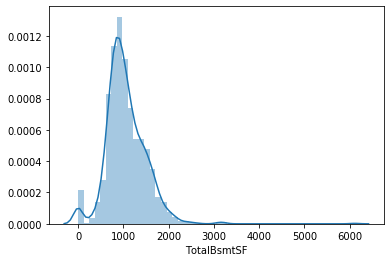

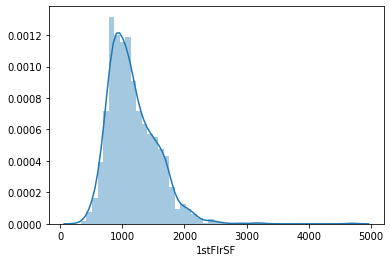

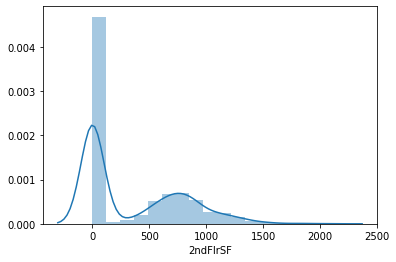

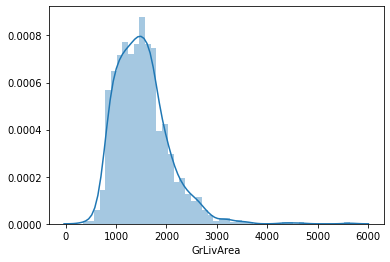

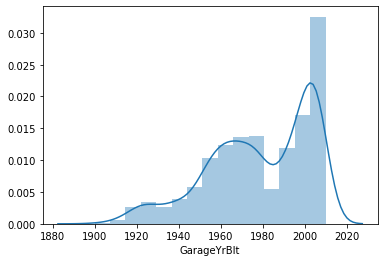

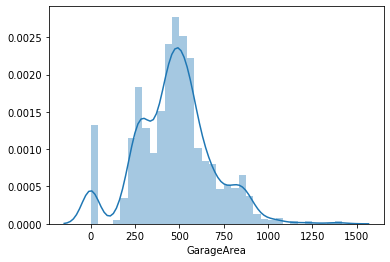

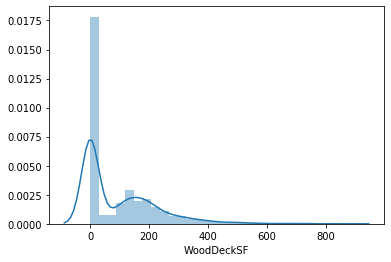

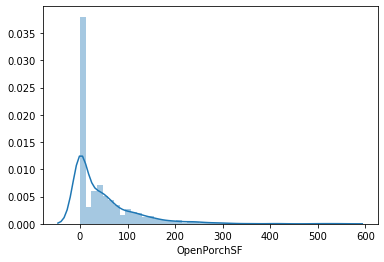

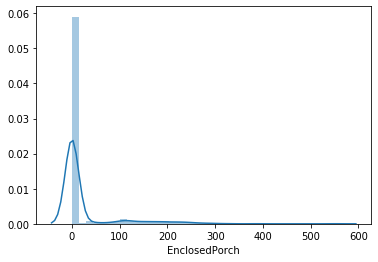

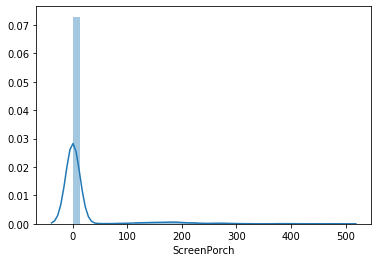

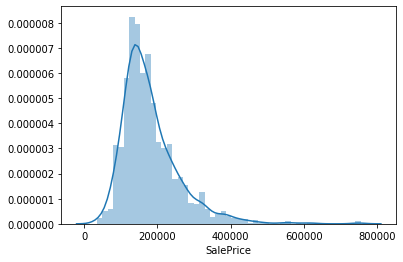

In [179]:
#Distribution Plot
for feat in num_feat:
    sns.distplot(train[feat])
    plt.show()

## For Categorical and Discreate Variables

In [180]:
for i in dis_feat:
    cat_feat.append(i)

In [232]:
cat_feat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [233]:
cat_feat
len(cat_feat)

58

### Count Plot

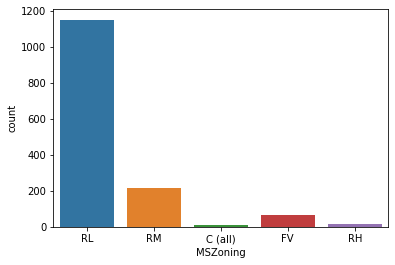

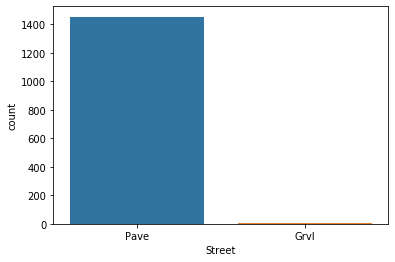

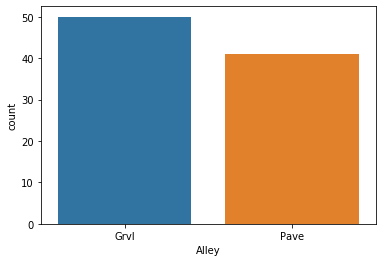

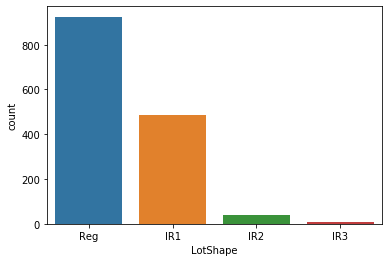

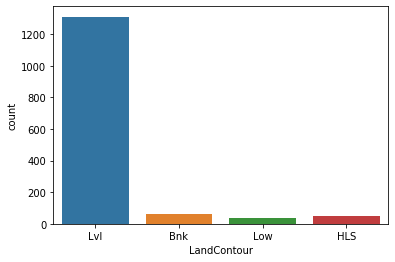

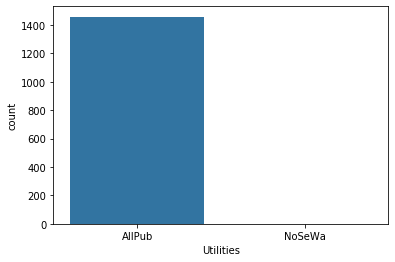

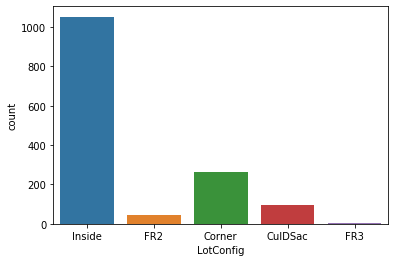

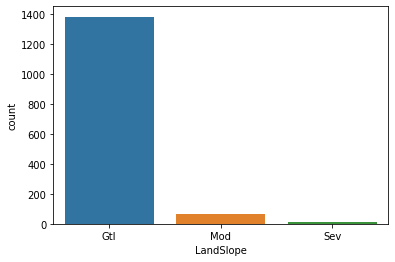

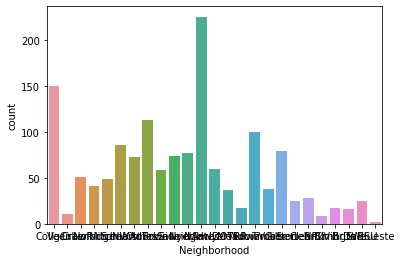

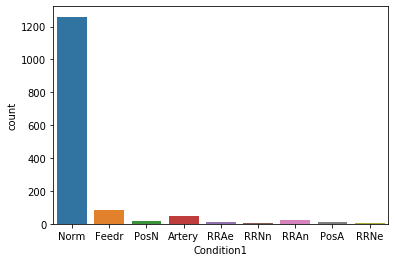

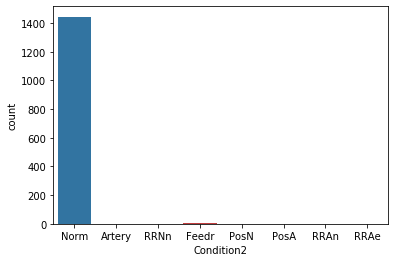

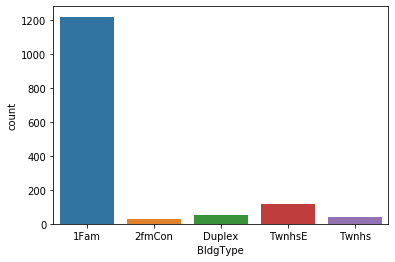

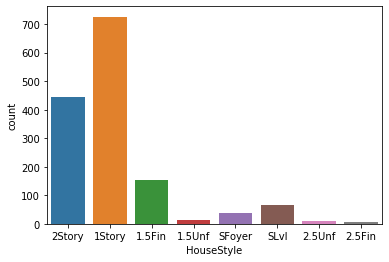

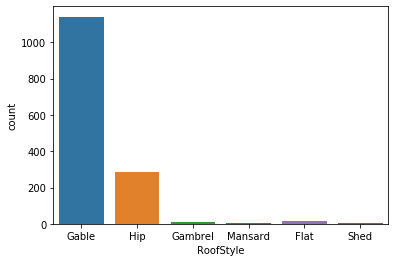

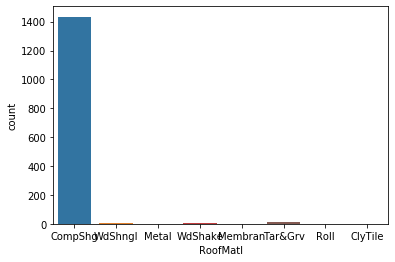

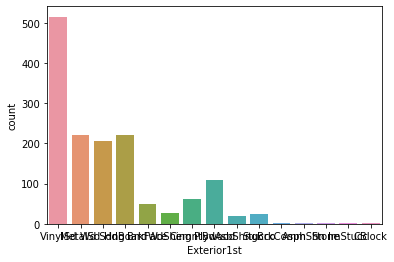

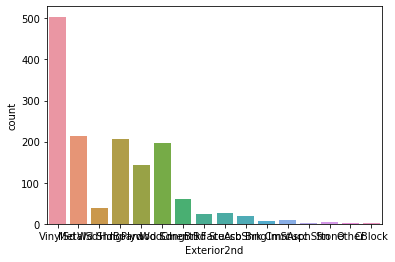

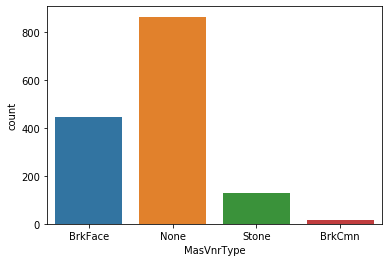

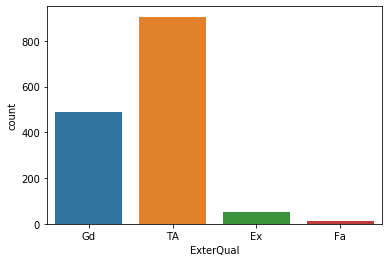

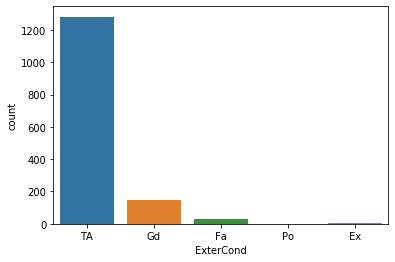

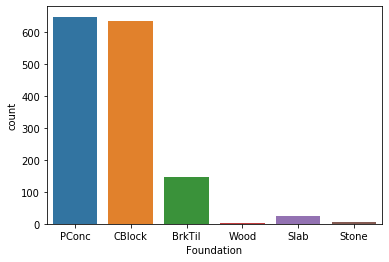

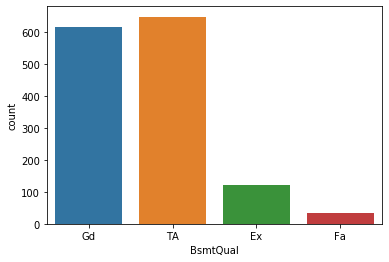

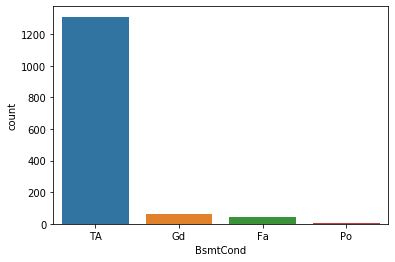

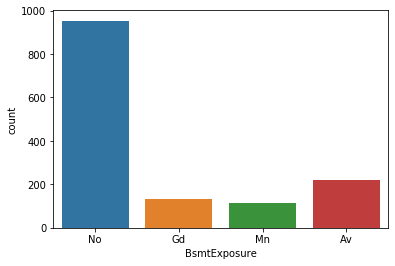

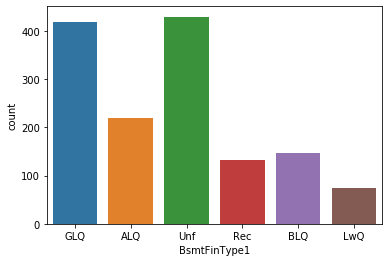

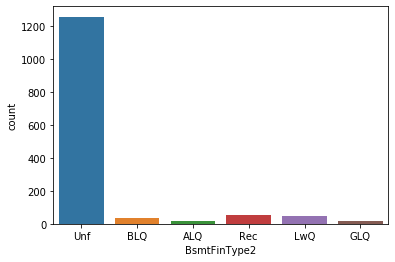

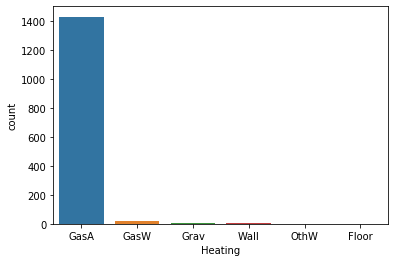

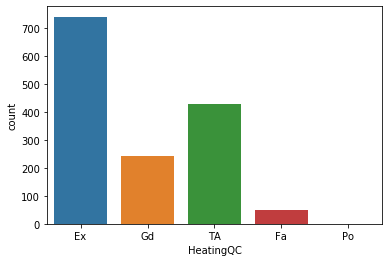

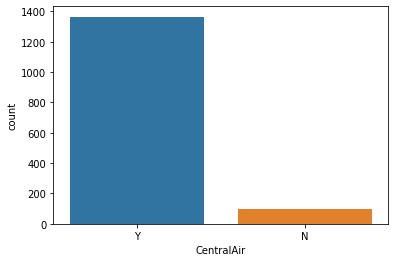

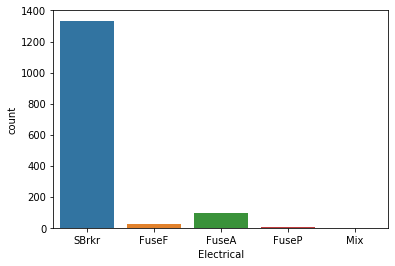

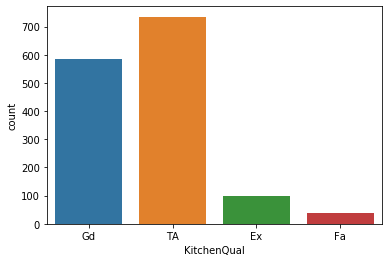

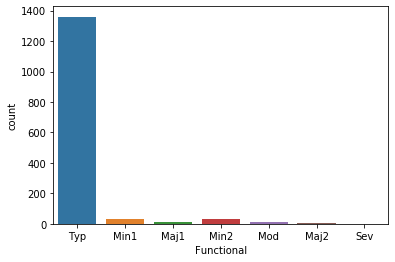

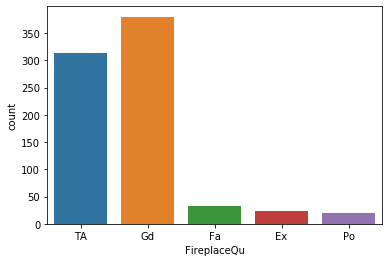

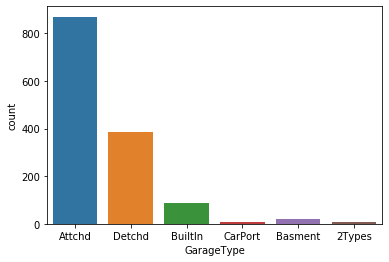

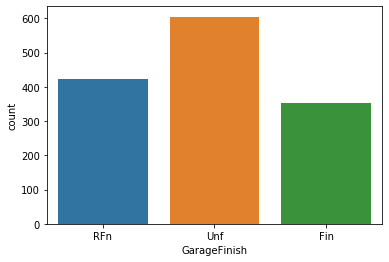

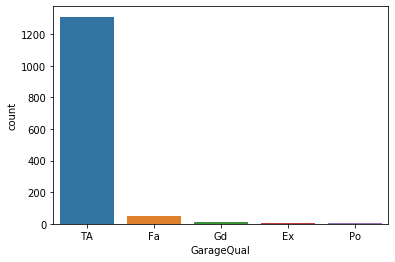

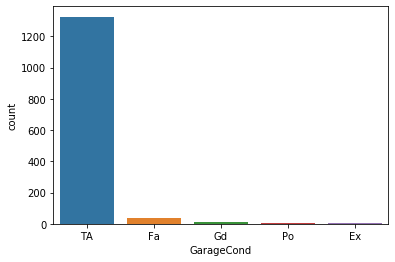

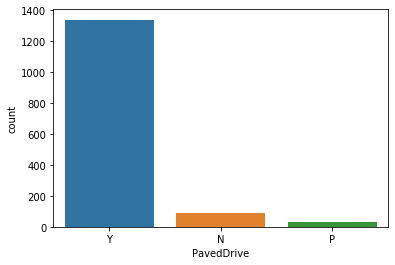

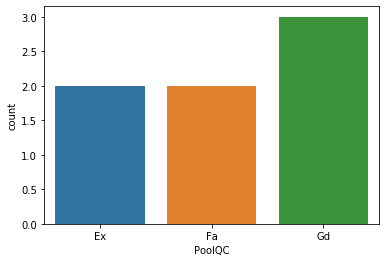

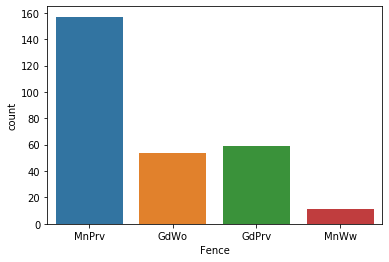

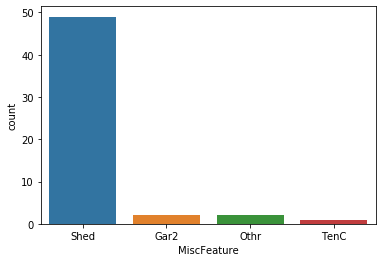

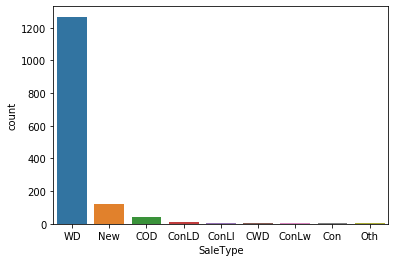

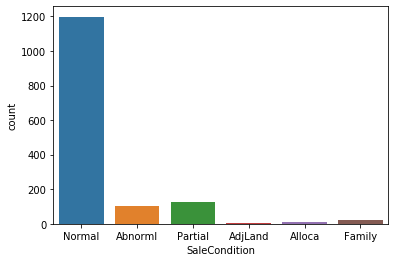

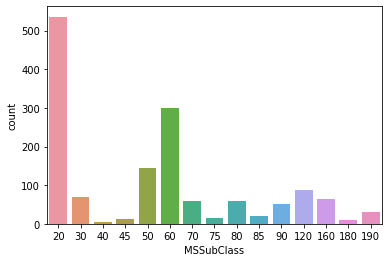

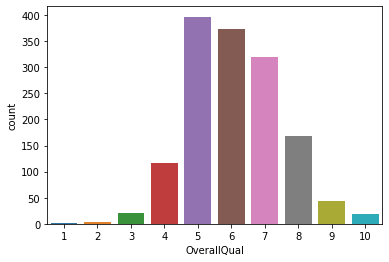

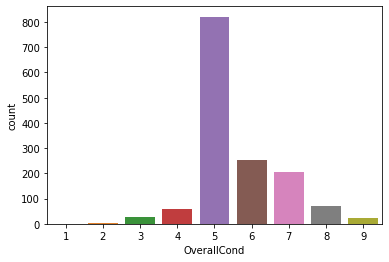

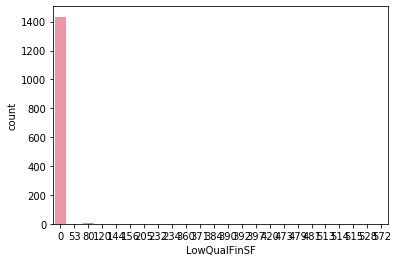

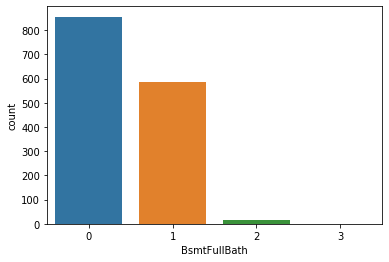

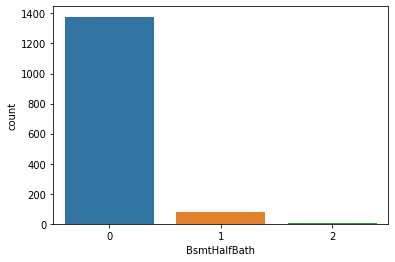

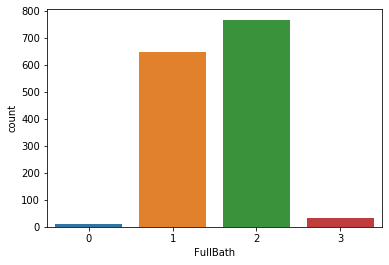

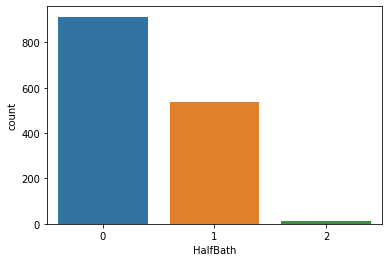

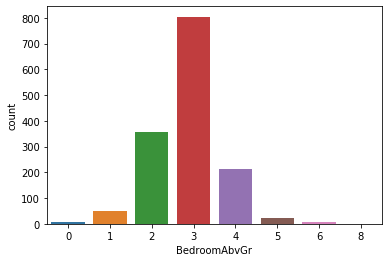

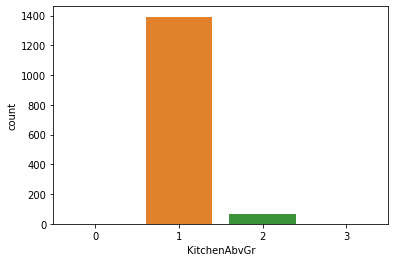

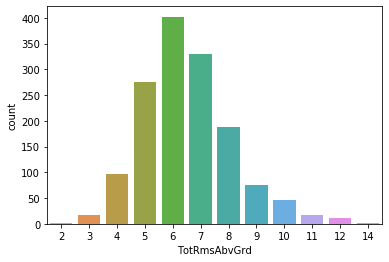

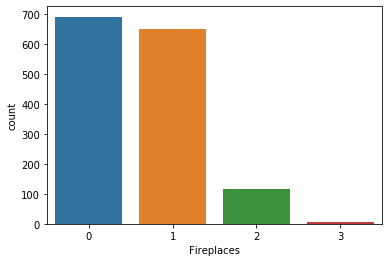

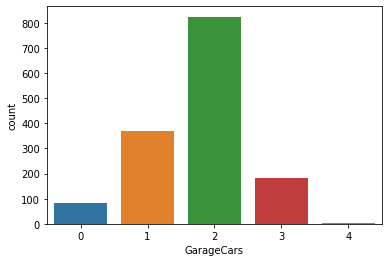

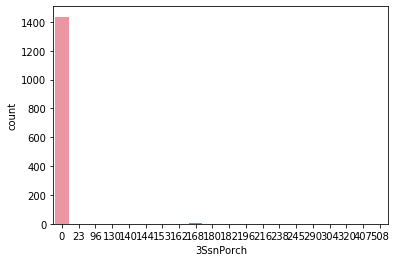

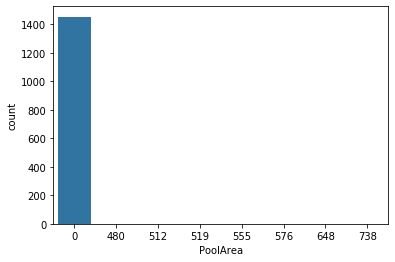

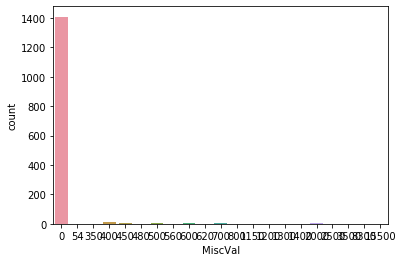

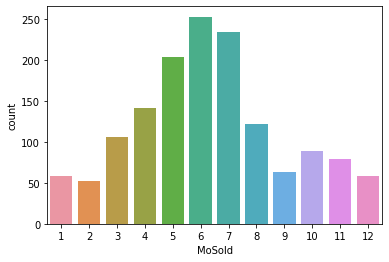

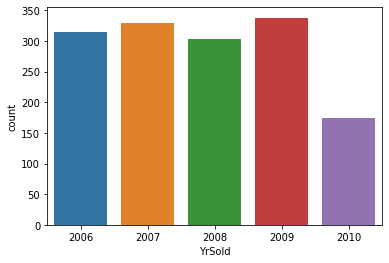

In [183]:
for feat in cat_feat:
    sns.countplot(feat, data=train)
    plt.show()

### Boxplot

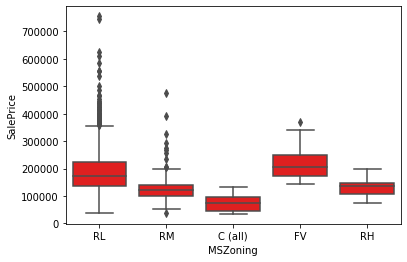

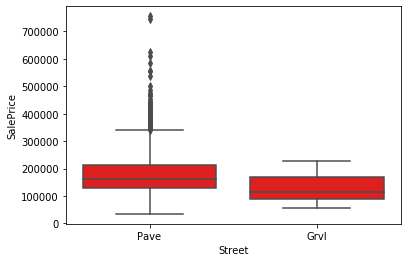

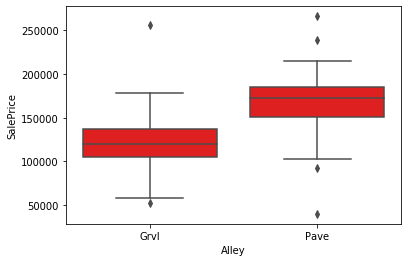

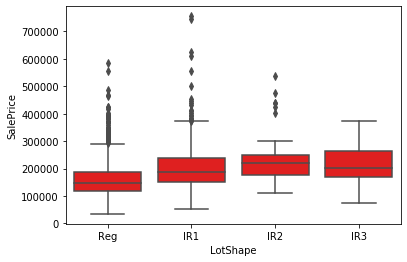

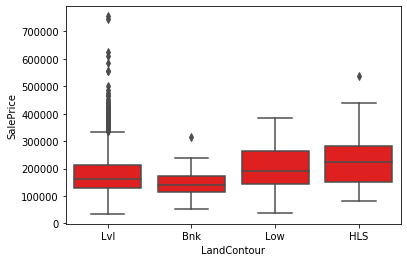

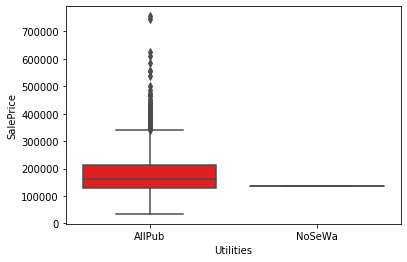

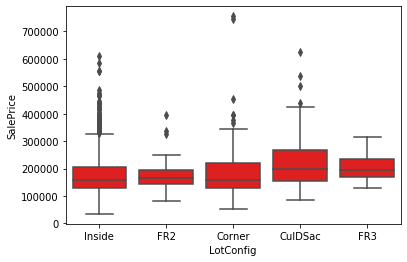

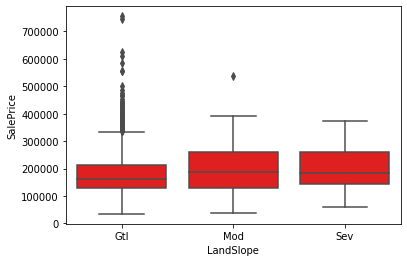

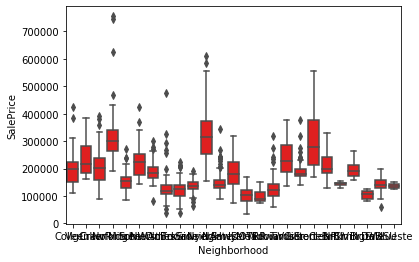

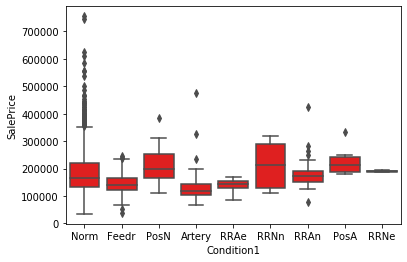

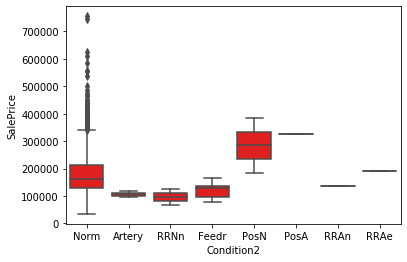

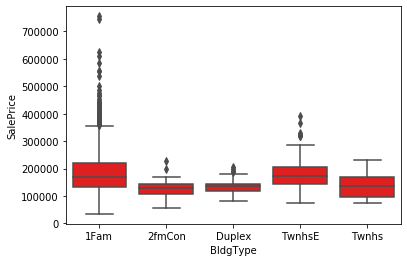

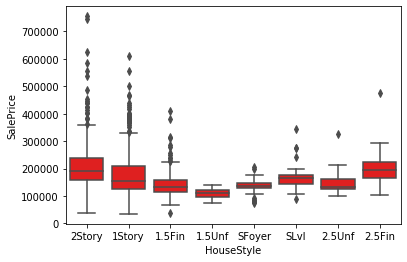

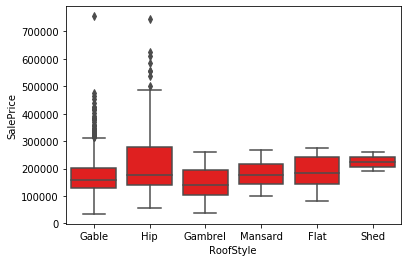

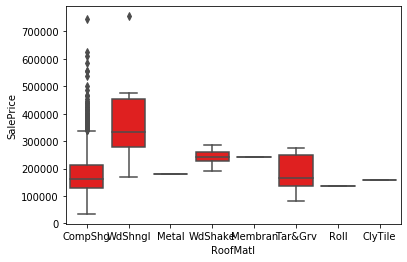

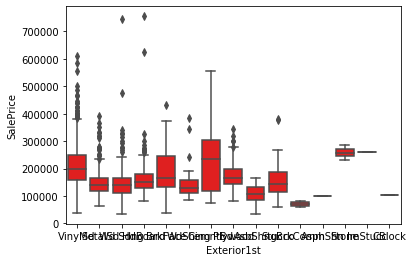

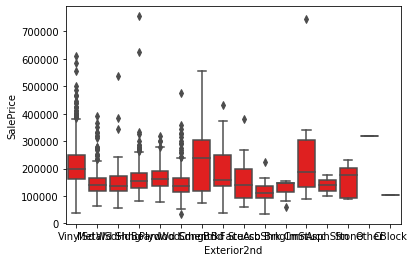

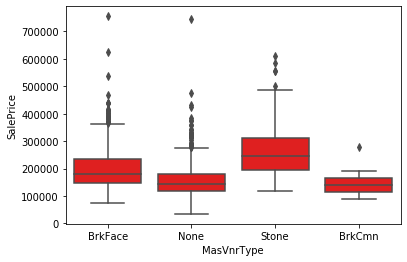

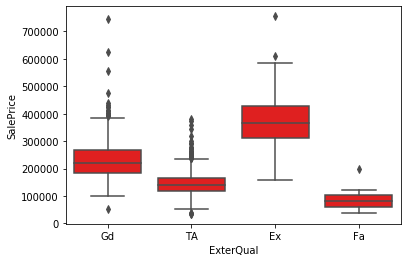

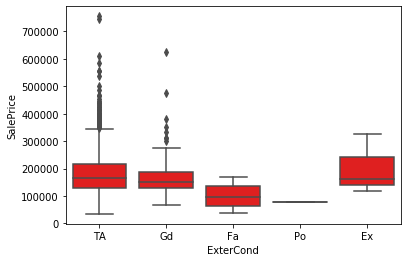

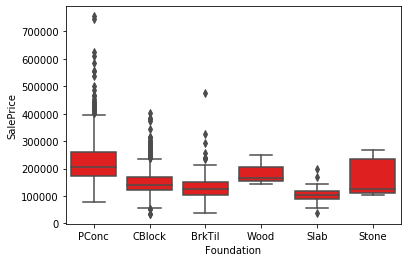

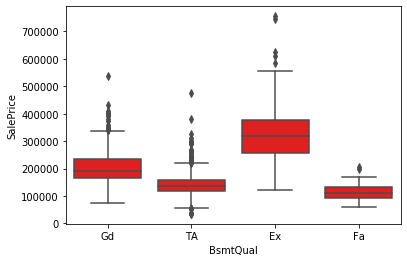

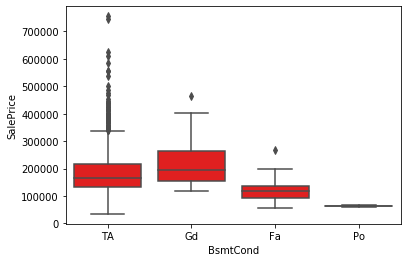

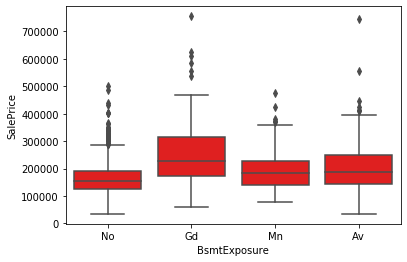

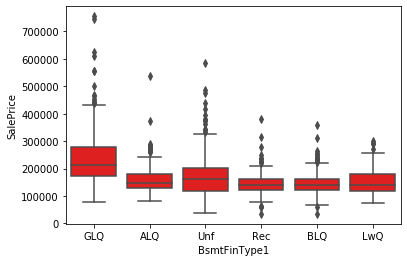

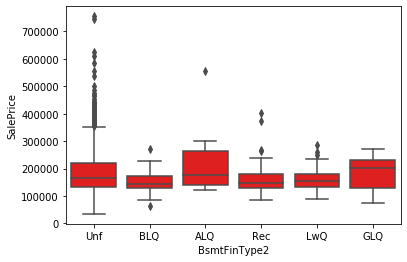

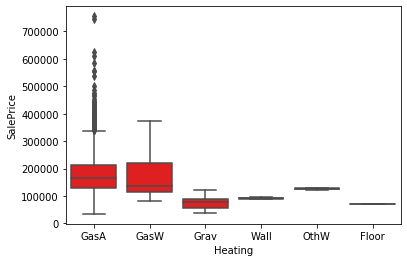

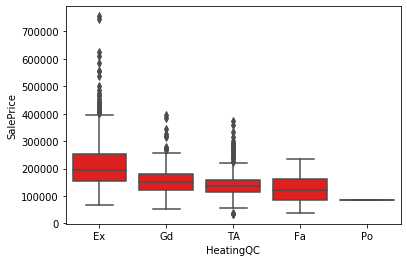

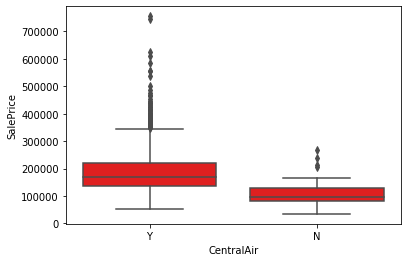

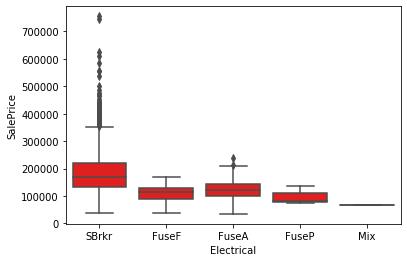

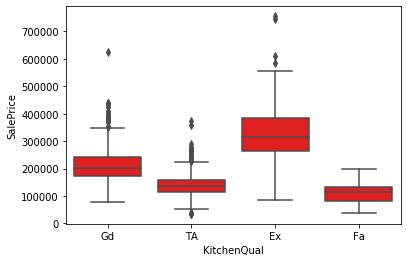

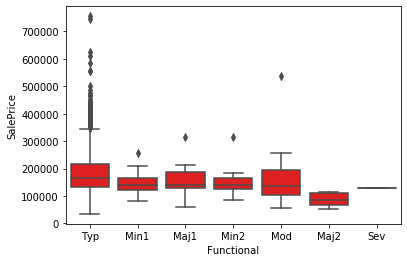

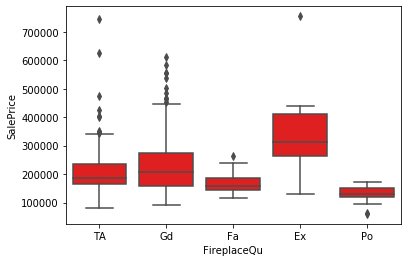

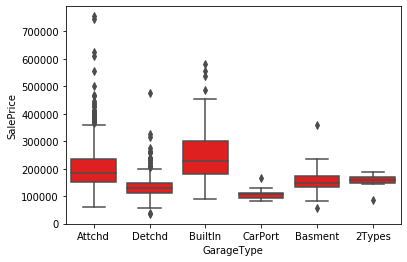

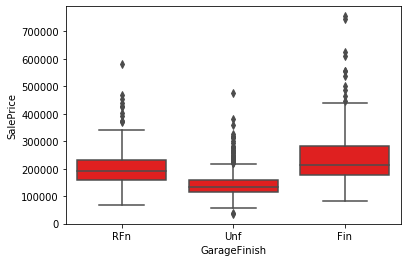

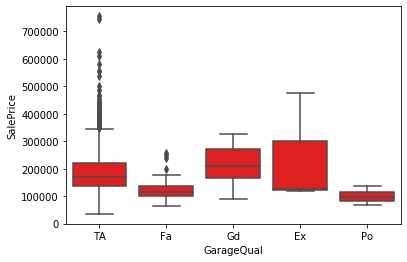

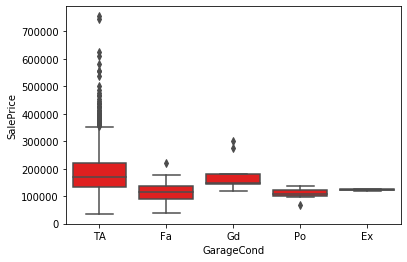

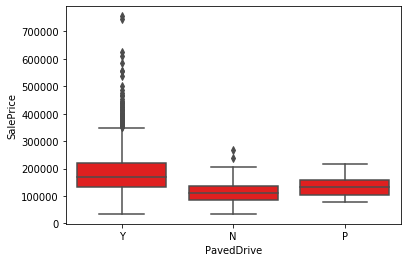

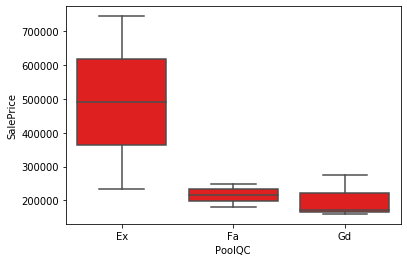

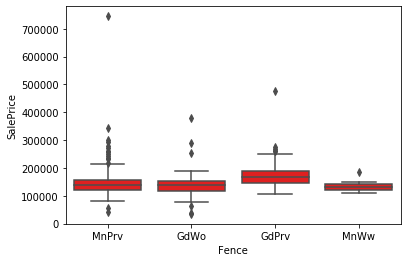

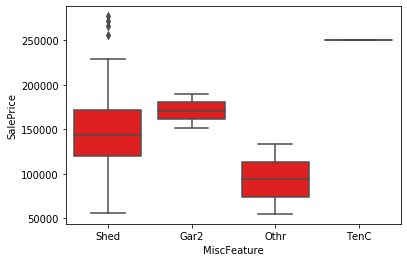

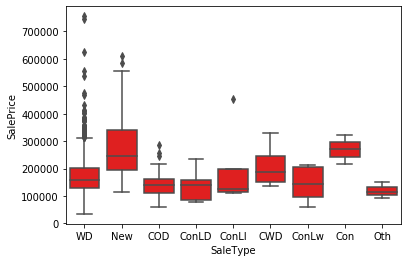

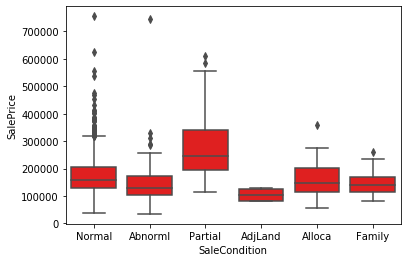

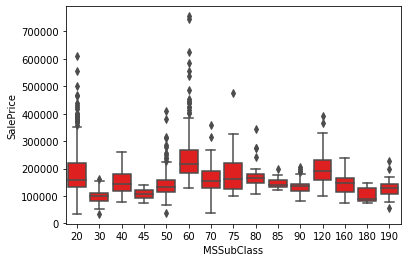

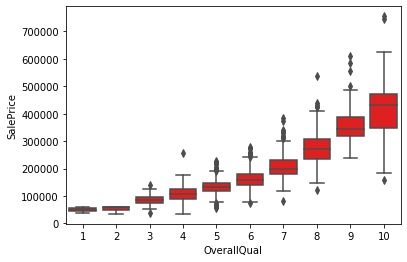

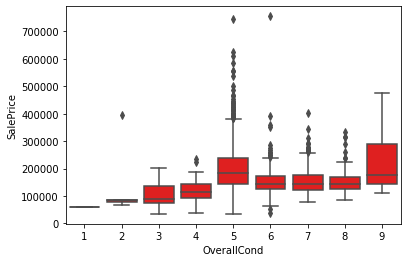

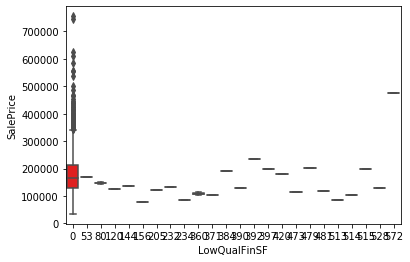

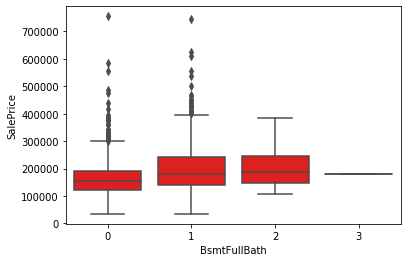

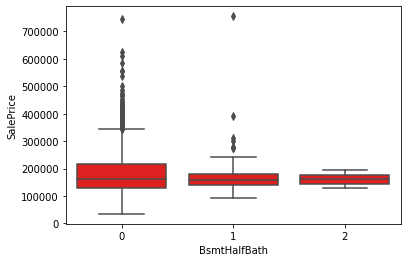

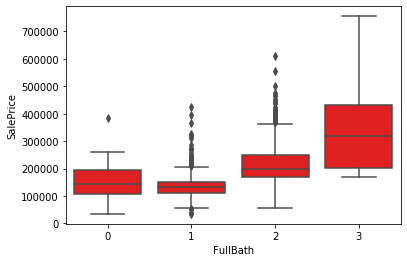

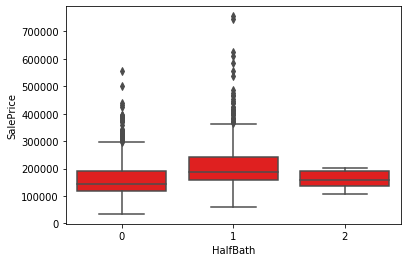

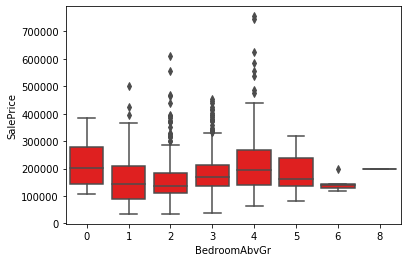

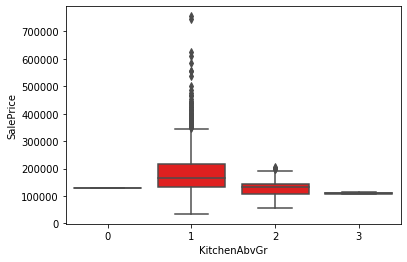

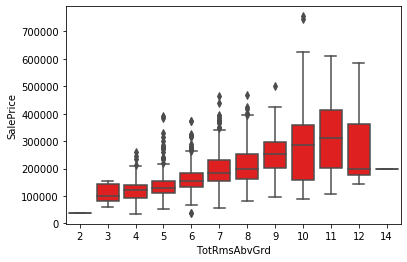

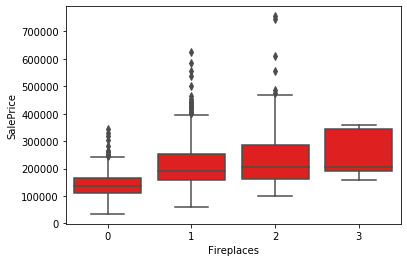

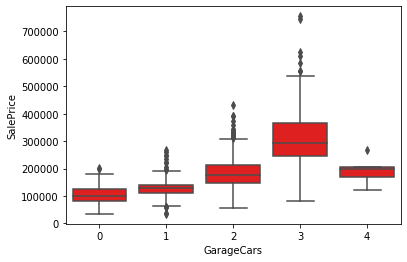

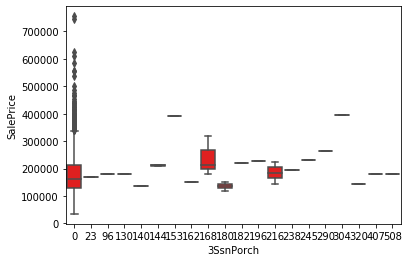

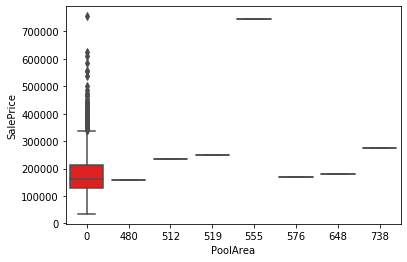

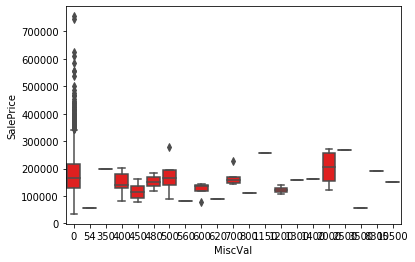

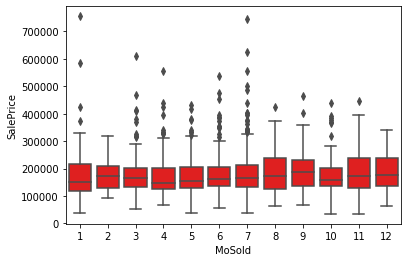

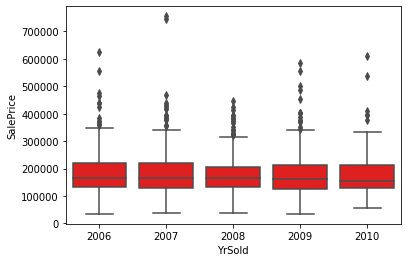

In [184]:
for i in cat_feat:
    sns.boxplot(train[i],train['SalePrice'],color='red')
    plt.xlabel(i)
    plt.title
    plt.show()

### Categorical Scatterplot

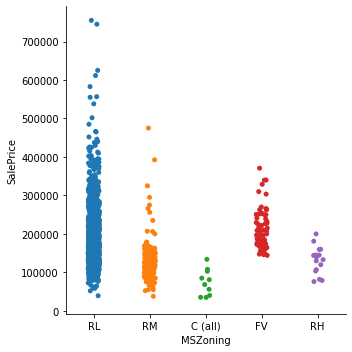

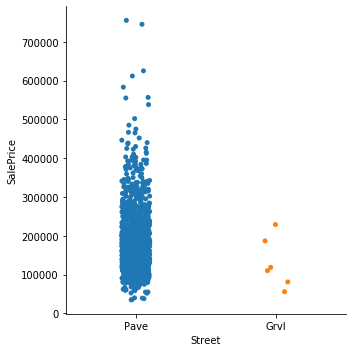

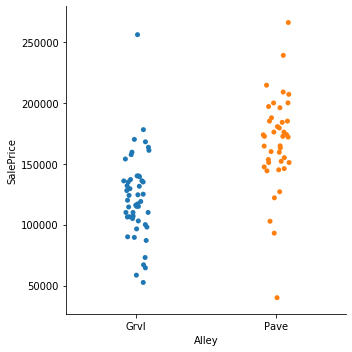

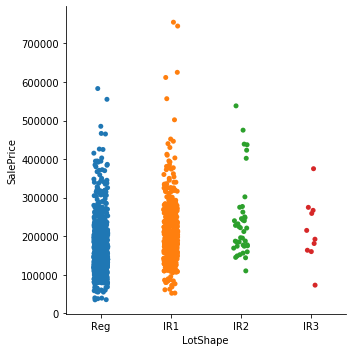

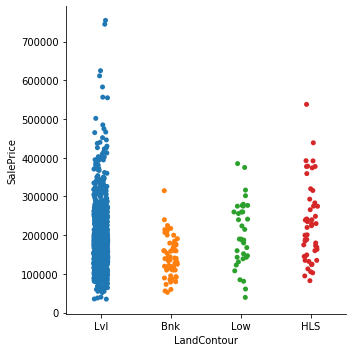

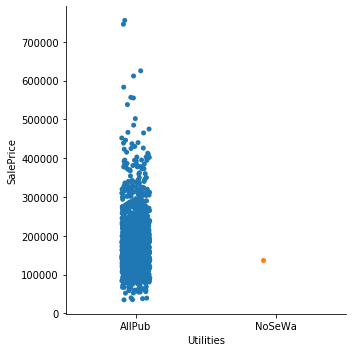

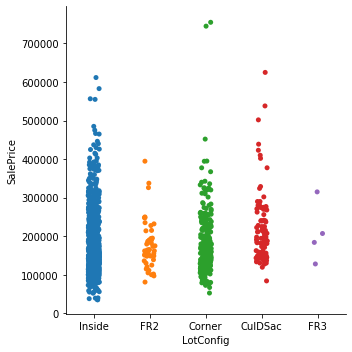

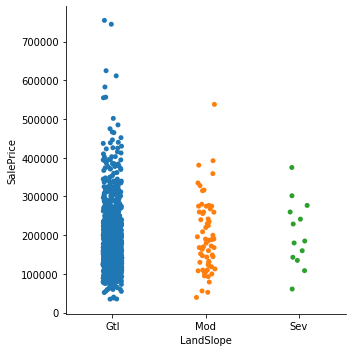

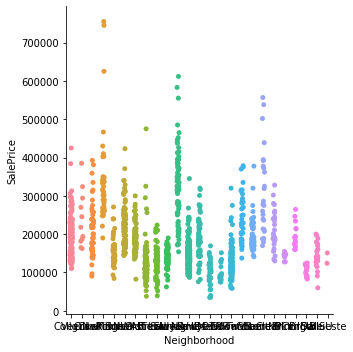

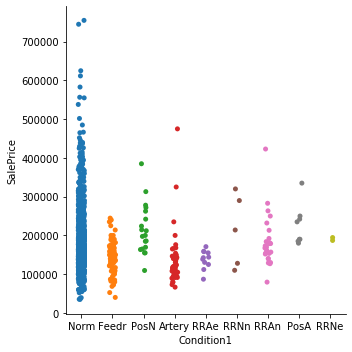

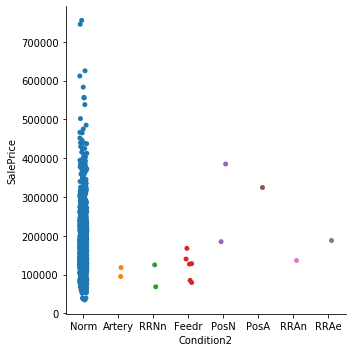

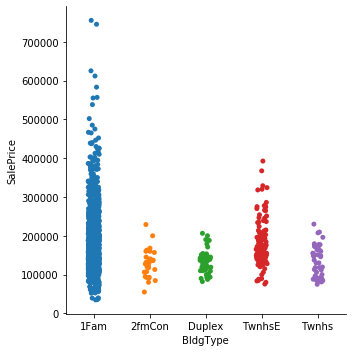

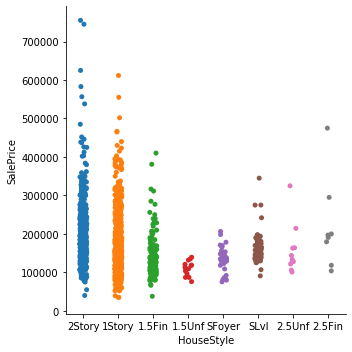

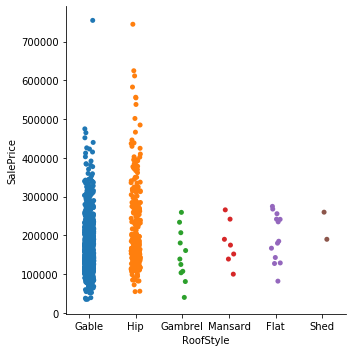

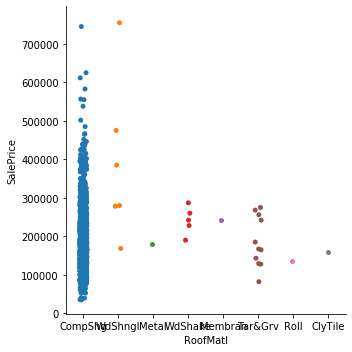

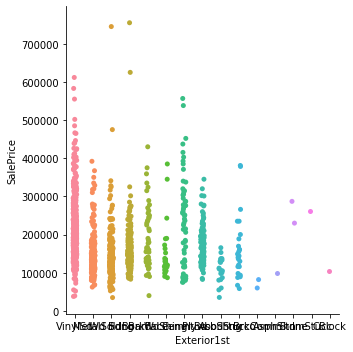

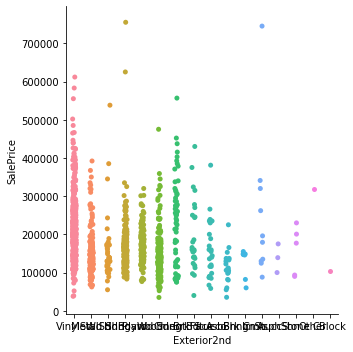

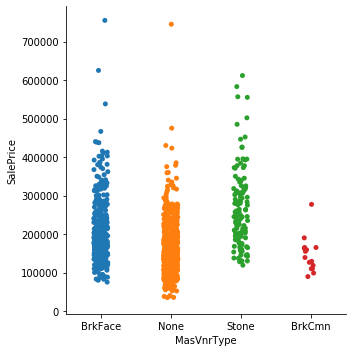

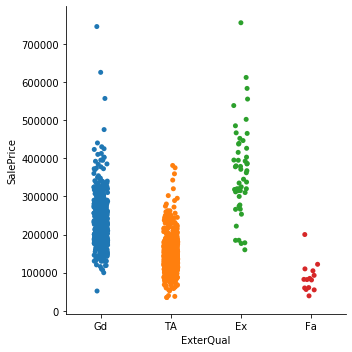

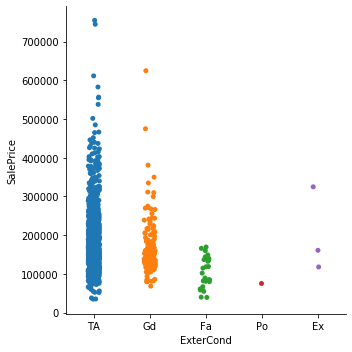

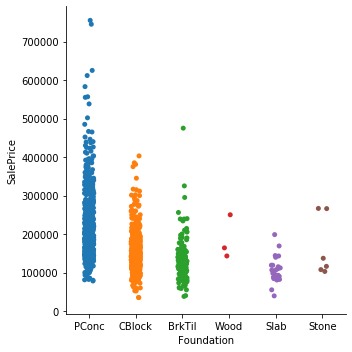

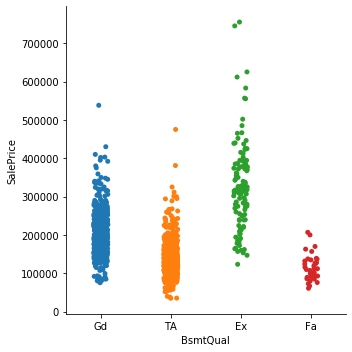

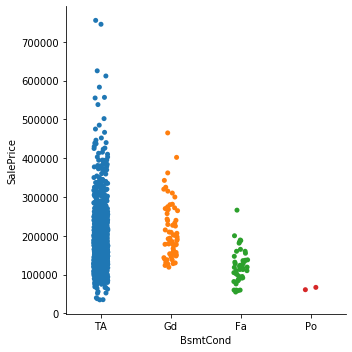

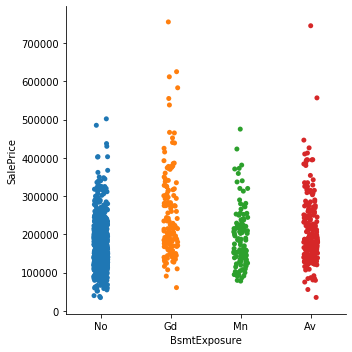

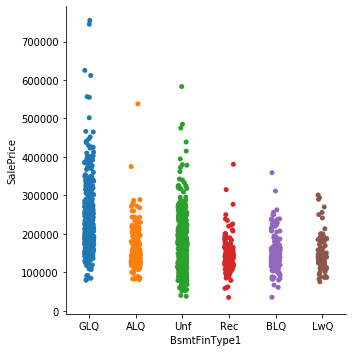

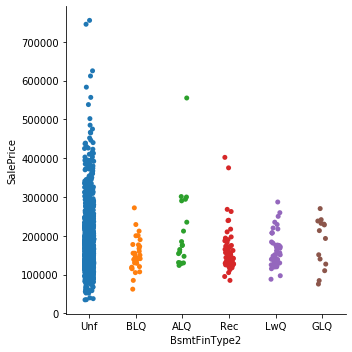

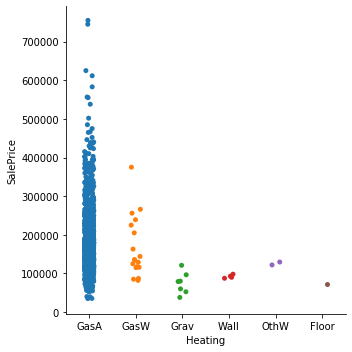

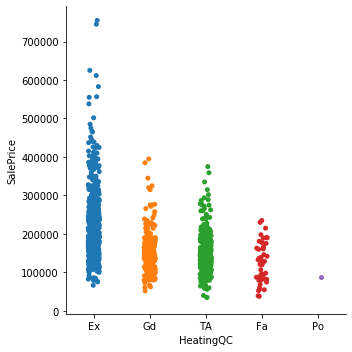

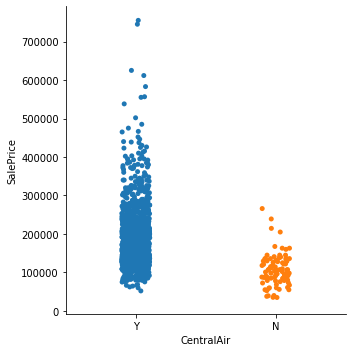

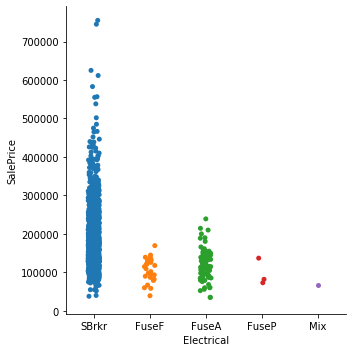

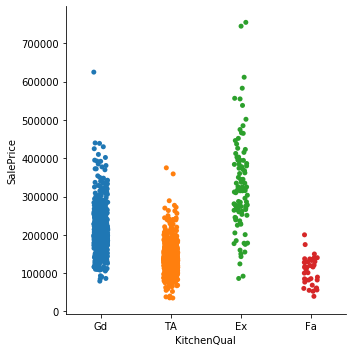

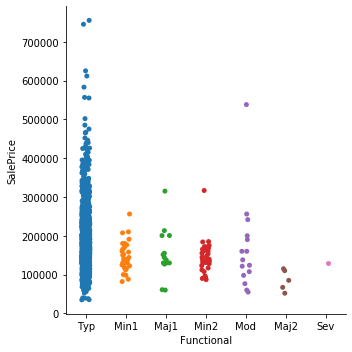

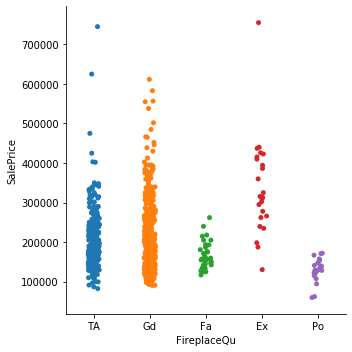

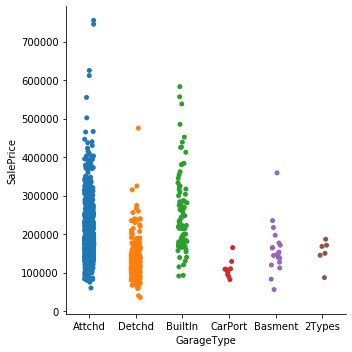

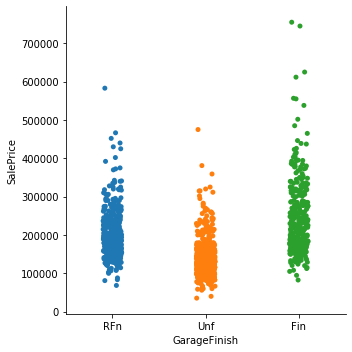

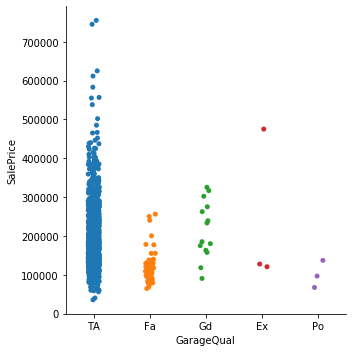

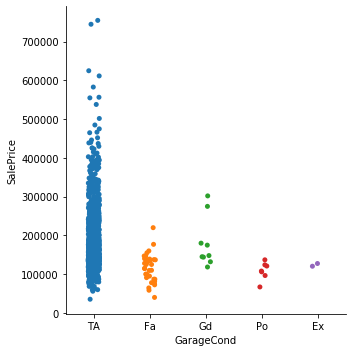

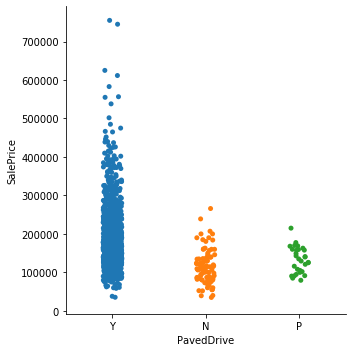

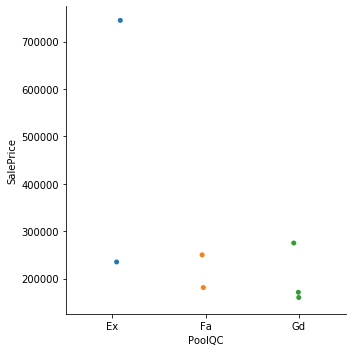

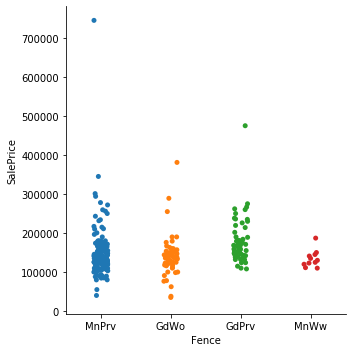

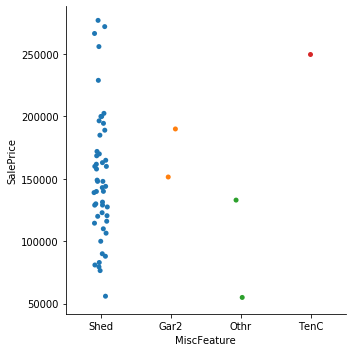

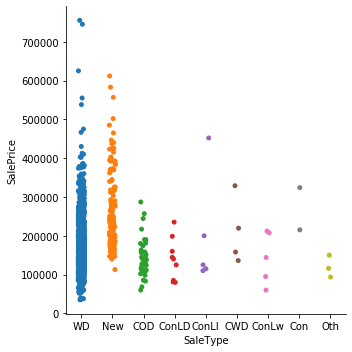

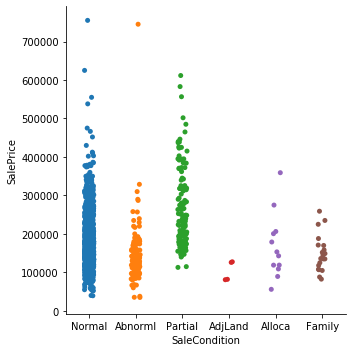

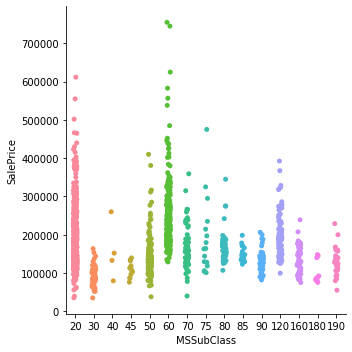

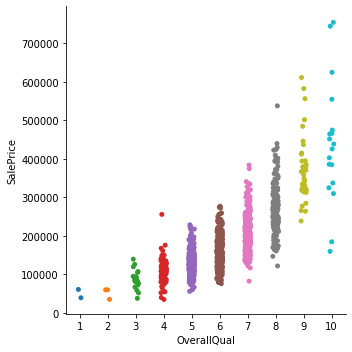

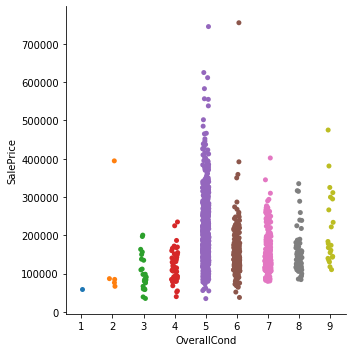

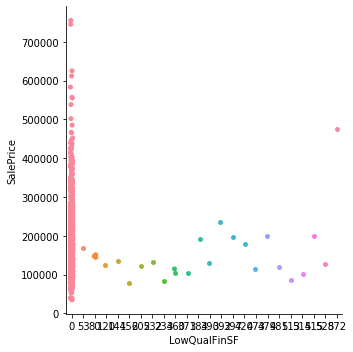

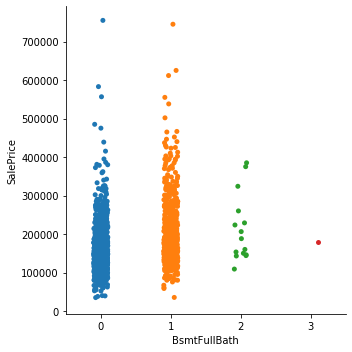

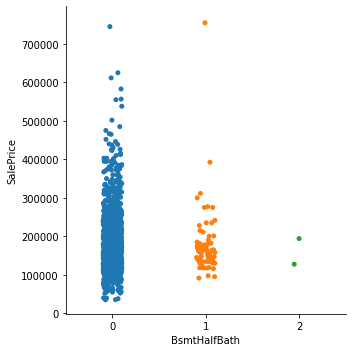

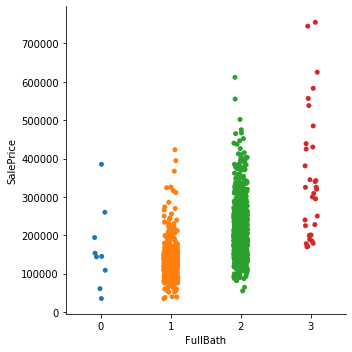

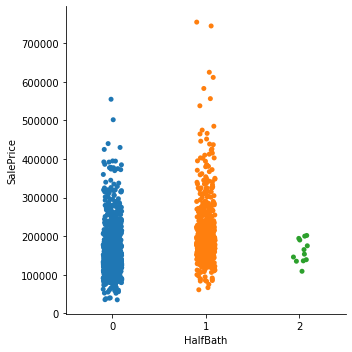

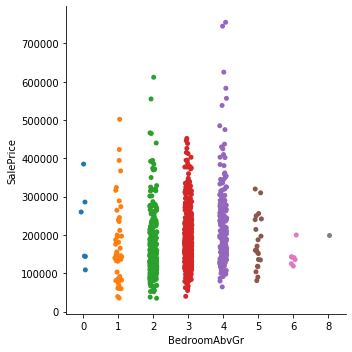

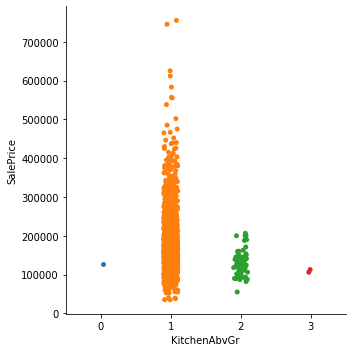

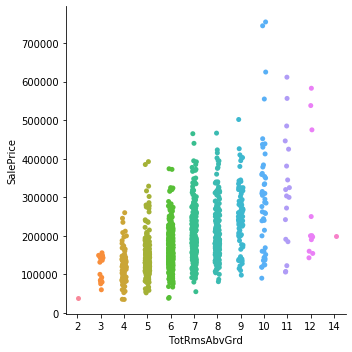

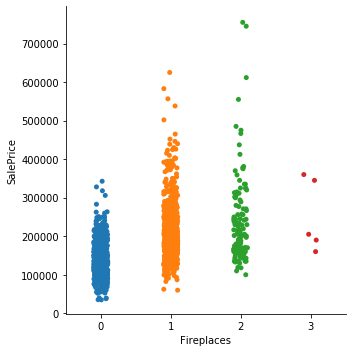

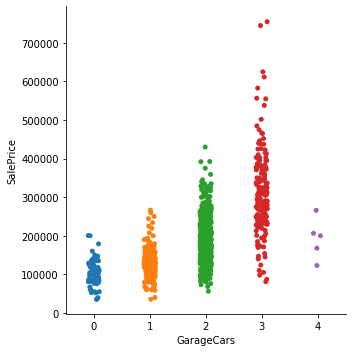

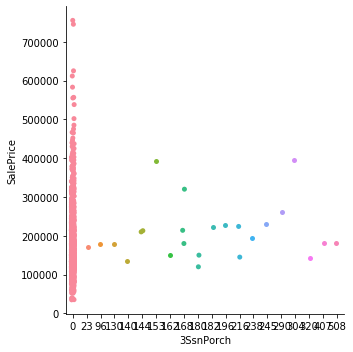

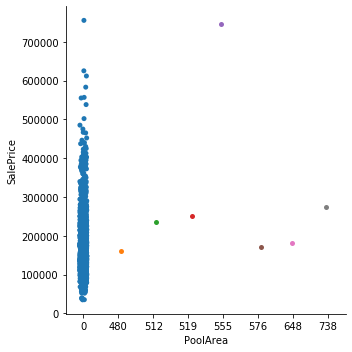

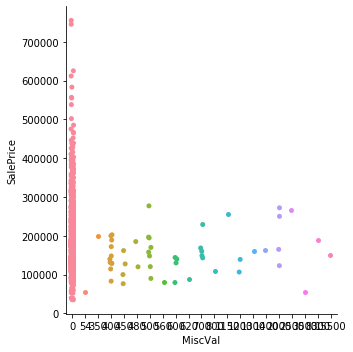

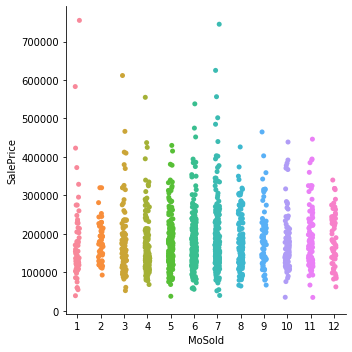

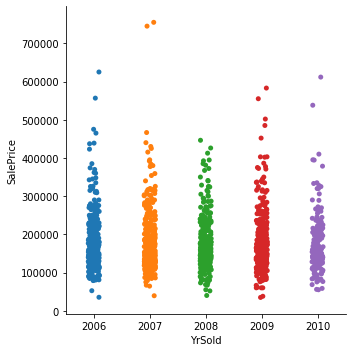

In [185]:
for feat in cat_feat:
    sns.catplot(x=feat, y="SalePrice", data=train)
    plt.show()

### Frequancy Table

In [186]:
for feat in cat_feat:
    freq_table = train[feat].value_counts().to_frame()
    freq_table.reset_index(inplace=True) # reset index
    freq_table.columns = [   feat   , "count"] # rename columns
    print(freq_table)
    

  MSZoning  count
0       RL   1151
1       RM    218
2       FV     65
3       RH     16
4  C (all)     10
  Street  count
0   Pave   1454
1   Grvl      6
  Alley  count
0  Grvl     50
1  Pave     41
  LotShape  count
0      Reg    925
1      IR1    484
2      IR2     41
3      IR3     10
  LandContour  count
0         Lvl   1311
1         Bnk     63
2         HLS     50
3         Low     36
  Utilities  count
0    AllPub   1459
1    NoSeWa      1
  LotConfig  count
0    Inside   1052
1    Corner    263
2   CulDSac     94
3       FR2     47
4       FR3      4
  LandSlope  count
0       Gtl   1382
1       Mod     65
2       Sev     13
   Neighborhood  count
0         NAmes    225
1       CollgCr    150
2       OldTown    113
3       Edwards    100
4       Somerst     86
5       Gilbert     79
6       NridgHt     77
7        Sawyer     74
8        NWAmes     73
9       SawyerW     59
10      BrkSide     58
11      Crawfor     51
12      Mitchel     49
13      NoRidge     41
14       Tim

# Data Cleaning

## Remove null values

### for numerical features

In [187]:
train[num_feat].isnull().sum()

Id                 0
LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageYrBlt       81
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
SalePrice          0
dtype: int64

In [220]:
for feat in train.columns:
    if train[feat].dtypes!='O':
        if len(train[feat].unique())>25:
            train[feat]=np.where(train[feat].isnull(),train[feat].mean(),train[feat])

In [221]:
train[num_feat].isnull().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageYrBlt      0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
dtype: int64

In [226]:
train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 78, dtype: int64

### for categorical features

In [190]:
train=train.drop(['PoolQC','Fence','MiscFeature'],axis=1)

In [191]:
cat_feat.remove('PoolQC')
cat_feat.remove('Fence')
cat_feat.remove('MiscFeature')
train[cat_feat].isnull().sum()

MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
SaleType            0
SaleCondition       0
MSSubClass          0
OverallQual         0
OverallCond         0
LowQualFinSF        0
BsmtFullBath        0
BsmtHalfBa

In [192]:
for feat in cat_feat:
    train[feat]=np.where(train[feat].isnull(),train[feat].mode(),train[feat])

In [193]:
train[cat_feat].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
MSSubClass       0
OverallQual      0
OverallCond      0
LowQualFinSF     0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars  

In [254]:
num_feat

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

## Feature scaling--- Applying normalizer on numerical data

In [232]:
for feat in train.columns:
    if train[feat].dtypes!='O':
        if len(train[feat].unique())>30:
            print(feat)
            train[feat]=np.log(train[feat])

Id
LotFrontage
LotArea
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
GrLivArea
GarageYrBlt
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
ScreenPorch
SalePrice


C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [231]:
train

Id  MSSubClass MSZoning  LotFrontage   LotArea Street Alley  \
0          NaN    4.094345       RL     0.356952  0.789308   Pave  Grvl   
1          NaN    2.995732       RL     0.390359  0.795652   Pave  Grvl   
2    -2.363952    4.094345       RL     0.364448  0.803361   Pave  Grvl   
3    -1.118914    4.248495       RL     0.343311  0.795395   Pave  Grvl   
4    -0.742579    4.094345       RL     0.397825  0.814538   Pave  Grvl   
...        ...         ...      ...          ...       ...    ...   ...   
1455  0.685923    4.094345       RL     0.348954  0.786018   Pave  Grvl   
1456  0.685971    2.995732       RL     0.399616  0.810852   Pave  Grvl   
1457  0.686018    4.248495       RL     0.359504  0.792691   Pave  Grvl   
1458  0.686066    2.995732       RL     0.364448  0.796247   Pave  Grvl   
1459  0.686113    2.995732       RL     0.380266  0.797345   Pave  Grvl   

     LotShape LandContour Utilities  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0         Reg         Lvl    AllPub  ...          -inf         0        -inf   
1         Reg         Lvl    AllPub  ...          -inf         0        -inf   
2         IR1         Lvl    AllPub  ...          -inf         0        -inf   
3         IR1         Lvl    AllPub  ...      5.605802         0        -inf   
4         IR1         Lvl    AllPub  ...          -inf         0        -inf   
...       ...         ...       ...  ...           ...       ...         ...   
1455      Reg         Lvl    AllPub  ...          -inf         0        -inf   
1456      Reg         Lvl    AllPub  ...          -inf         0        -inf   
1457      Reg         Lvl    AllPub  ...          -inf         0        -inf   
1458      Reg         Lvl    AllPub  ...      4.718499         0        -inf   
1459      Reg         Lvl    AllPub  ...          -inf         0        -inf   

     PoolArea MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0           0       0      2   2008        WD         Normal  12.247694  
1           0       0      5   2007        WD         Normal  12.109011  
2           0       0      9   2008        WD         Normal  12.317167  
3           0       0      2   2006        WD        Abnorml  11.849398  
4           0       0     12   2008        WD         Normal  12.429216  
...       ...     ...    ...    ...       ...            ...        ...  
1455        0       0      8   2007        WD         Normal  12.072541  
1456        0       0      2   2010        WD         Normal  12.254863  
1457        0    2500      5   2010        WD         Normal  12.493130  
1458        0       0      4   2010        WD         Normal  11.864462  
1459        0       0      6   2008        WD         Normal  11.901583  

[1460 rows x 78 columns]

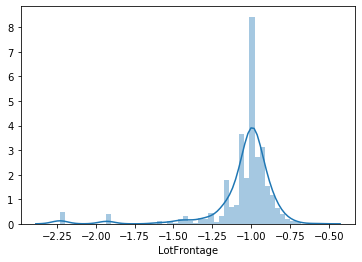

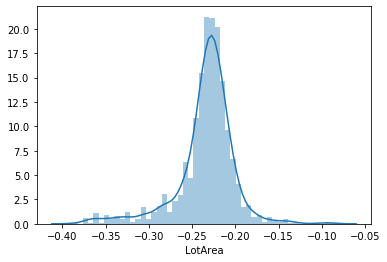

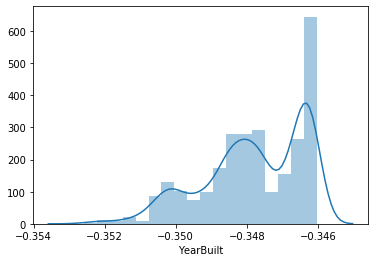

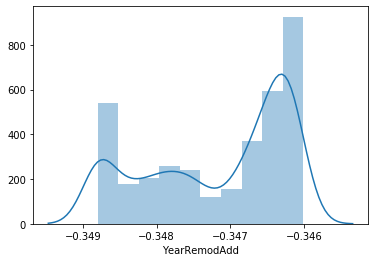

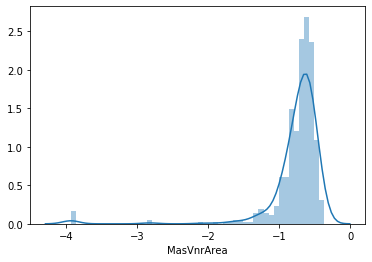

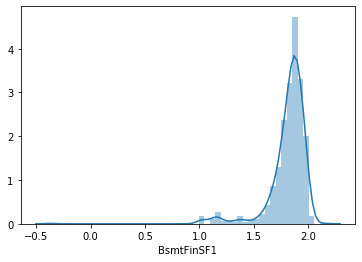

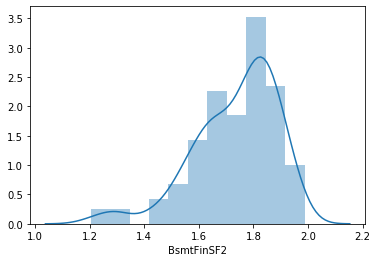

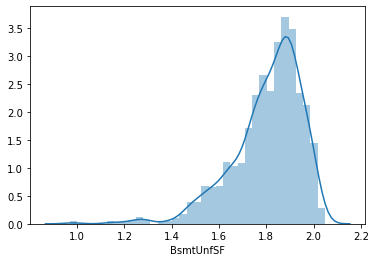

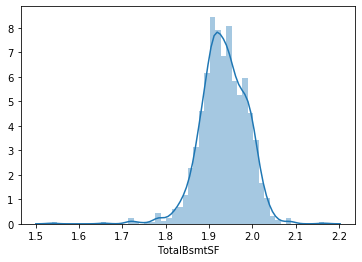

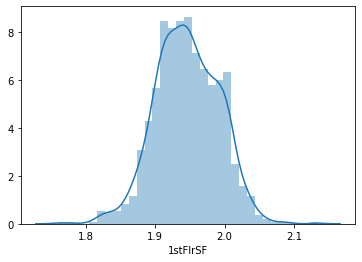

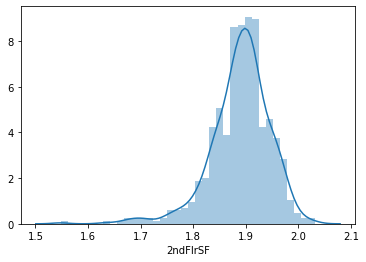

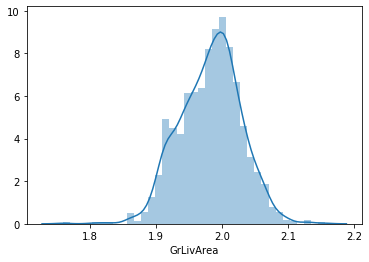

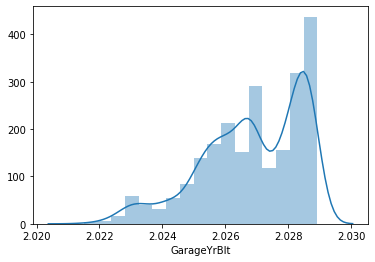

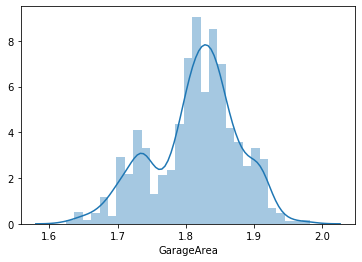

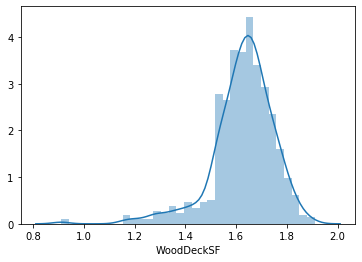

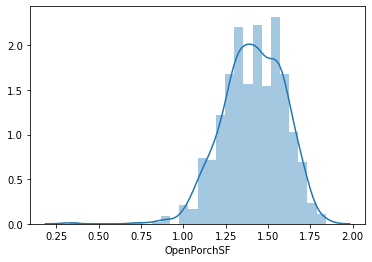

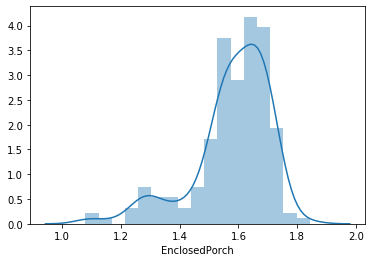

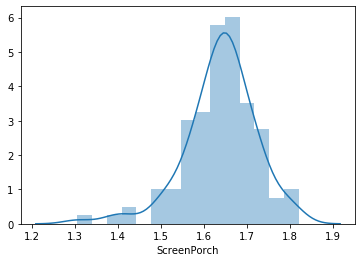

In [233]:
for feat in num_feat:
    sns.distplot(train[feat])
    plt.show()

## Removing outliers

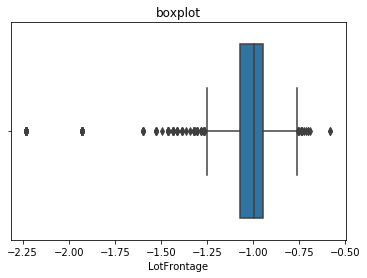

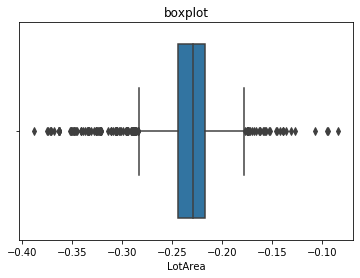

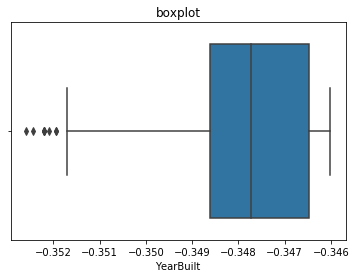

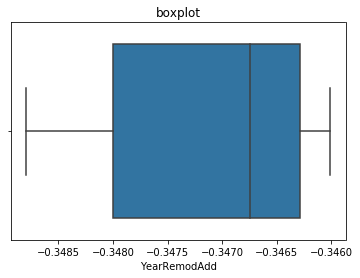

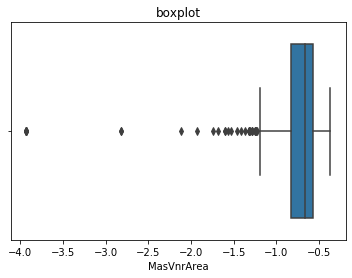

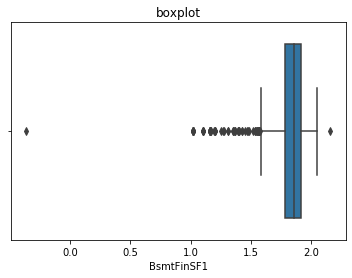

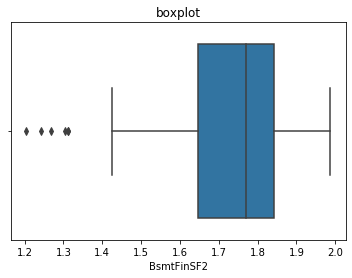

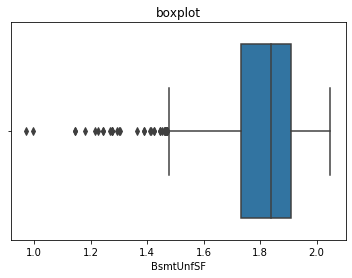

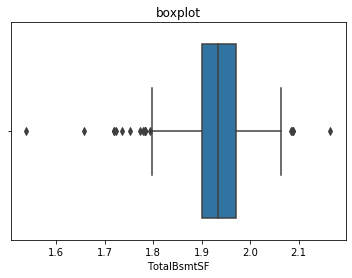

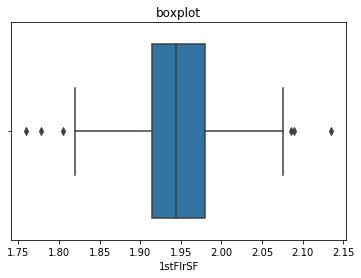

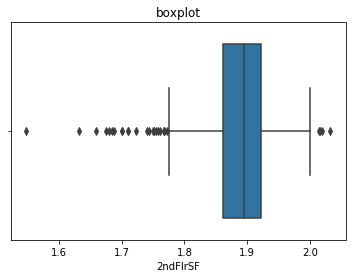

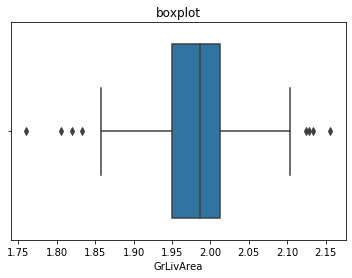

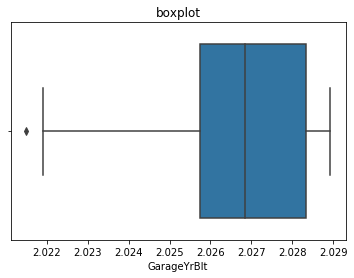

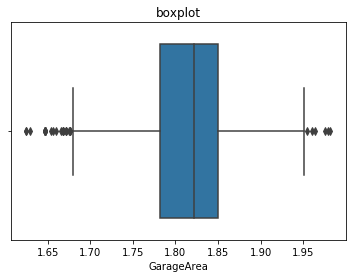

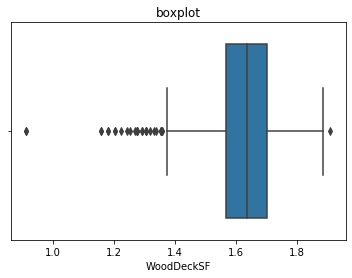

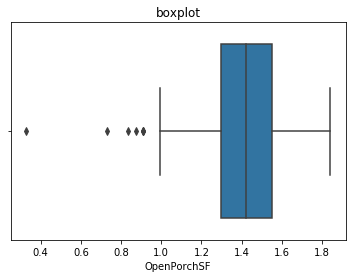

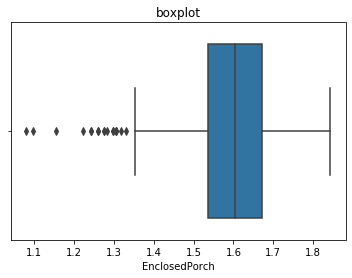

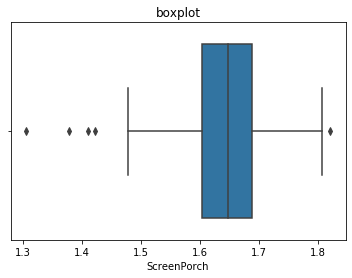

In [236]:
for feat in num_feat:
    sns.boxplot(train[feat])
    plt.xlabel(feat)
    plt.title('boxplot')
    plt.show()

In [242]:
from scipy import stats
z = np.abs(stats.zscore(train[num_feat]))
print(z)

[[0.08104139 0.07115299 1.04347698 ...        nan        nan        nan]
 [0.48378059 0.16500087 0.16537774 ...        nan        nan        nan]
 [0.17458887 0.4494597  0.97895679 ...        nan        nan        nan]
 ...
 [0.11310532 0.05500456 0.99619385 ...        nan        nan        nan]
 [0.17458887 0.1870761  0.69493904 ...        nan        nan        nan]
 [0.36585661 0.22772031 0.196811   ...        nan        nan        nan]]


## Using IQR method

In [244]:
Q1 = train[num_feat].quantile(0.25)
Q3 = train[num_feat].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LotFrontage      0.123430
LotArea          0.026709
YearBuilt        0.002141
YearRemodAdd     0.001713
MasVnrArea       0.251835
BsmtFinSF1       0.134073
BsmtFinSF2       0.196728
BsmtUnfSF        0.173707
TotalBsmtSF      0.069180
1stFlrSF         0.065039
2ndFlrSF         0.059352
GrLivArea        0.062453
GarageYrBlt      0.002593
GarageArea       0.068765
WoodDeckSF       0.135215
OpenPorchSF      0.253055
EnclosedPorch    0.135882
ScreenPorch      0.085522
dtype: float64


In [245]:
print( train[num_feat]< (Q1 - 1.5 * IQR)) |(train[num_feat] > (Q3 + 1.5 * IQR))

      LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0           False    False      False         False       False       False   
1           False    False      False         False       False       False   
2           False    False      False         False       False       False   
3           False    False      False         False       False       False   
4           False    False      False         False       False       False   
...           ...      ...        ...           ...         ...         ...   
1455        False    False      False         False       False       False   
1456        False    False      False         False       False       False   
1457        False    False      False         False       False       False   
1458        False    False      False         False       False        True   
1459        False    False      False         False       False       False   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF 

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [248]:
train[num_feat]= train[num_feat][~((train[num_feat] < (Q1 - 1.5 * IQR)) |(train[num_feat] > (Q3 + 1.5 * IQR))).any(axis=1)][~((train[num_feat] < (Q1 - 1.5 * IQR)) |(train[num_feat] > (Q3 + 1.5 * IQR))).any(axis=1)]

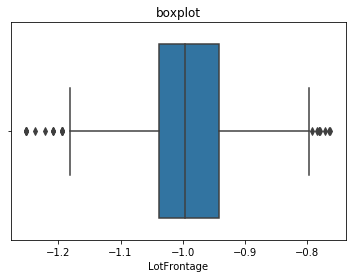

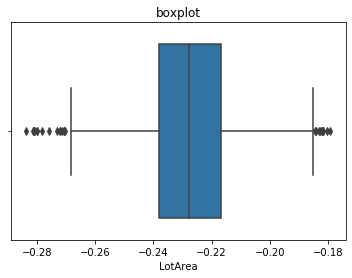

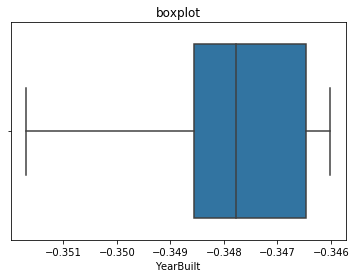

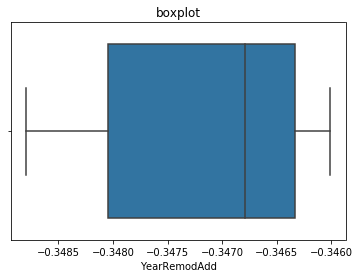

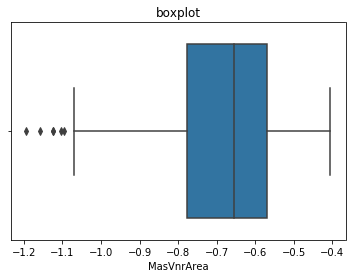

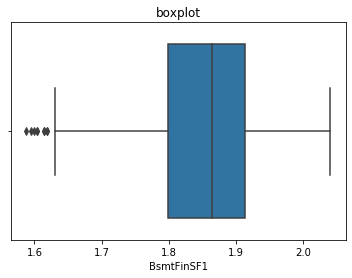

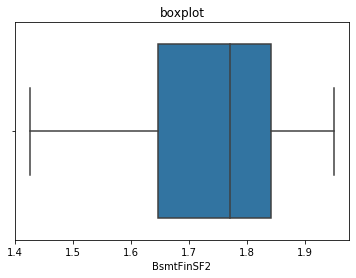

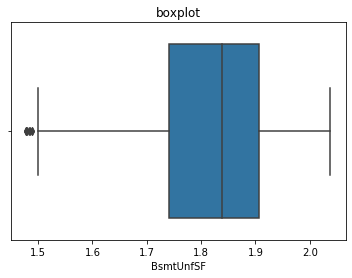

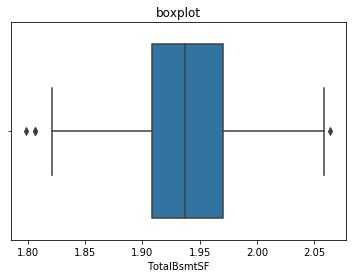

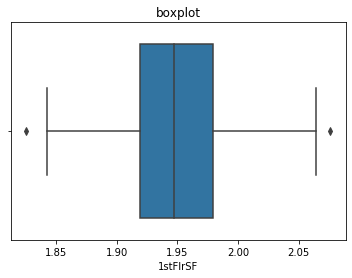

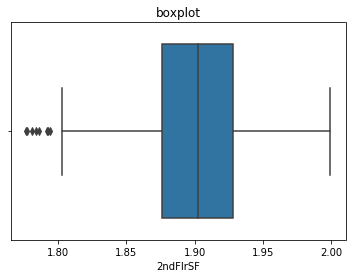

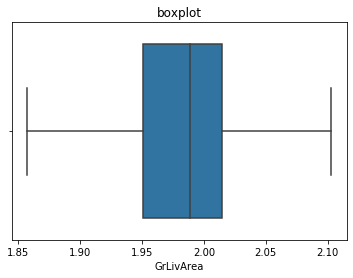

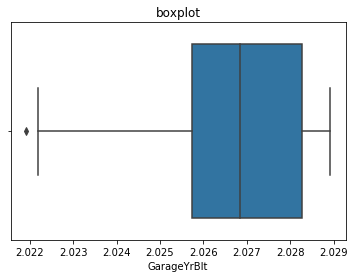

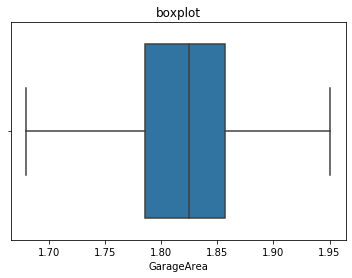

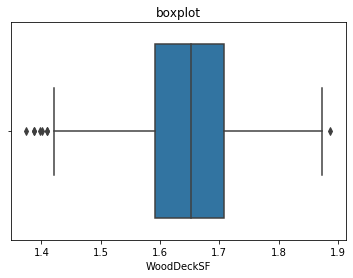

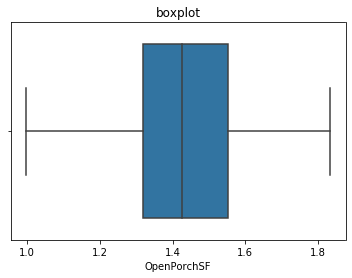

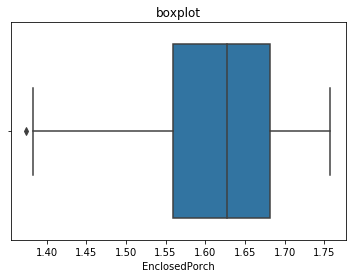

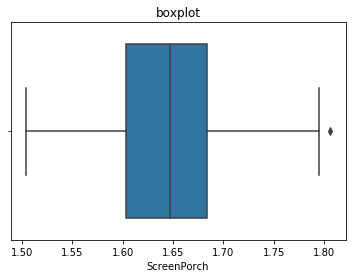

In [249]:
for feat in num_feat:
    sns.boxplot(train[feat])
    plt.xlabel(feat)
    plt.title('boxplot')
    plt.show()

# Version1

In [2]:
#import the data sets
train=pd.read_csv("train.csv")
train.head(30)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0    1          60       RL         65.0     8450   Pave   NaN      Reg   
1    2          20       RL         80.0     9600   Pave   NaN      Reg   
2    3          60       RL         68.0    11250   Pave   NaN      IR1   
3    4          70       RL         60.0     9550   Pave   NaN      IR1   
4    5          60       RL         84.0    14260   Pave   NaN      IR1   
5    6          50       RL         85.0    14115   Pave   NaN      IR1   
6    7          20       RL         75.0    10084   Pave   NaN      Reg   
7    8          60       RL          NaN    10382   Pave   NaN      IR1   
8    9          50       RM         51.0     6120   Pave   NaN      Reg   
9   10         190       RL         50.0     7420   Pave   NaN      Reg   
10  11          20       RL         70.0    11200   Pave   NaN      Reg   
11  12          60       RL         85.0    11924   Pave   NaN      IR1   
12  13          20       RL          NaN    12968   Pave   NaN      IR2   
13  14          20       RL         91.0    10652   Pave   NaN      IR1   
14  15          20       RL          NaN    10920   Pave   NaN      IR1   
15  16          45       RM         51.0     6120   Pave   NaN      Reg   
16  17          20       RL          NaN    11241   Pave   NaN      IR1   
17  18          90       RL         72.0    10791   Pave   NaN      Reg   
18  19          20       RL         66.0    13695   Pave   NaN      Reg   
19  20          20       RL         70.0     7560   Pave   NaN      Reg   
20  21          60       RL        101.0    14215   Pave   NaN      IR1   
21  22          45       RM         57.0     7449   Pave  Grvl      Reg   
22  23          20       RL         75.0     9742   Pave   NaN      Reg   
23  24         120       RM         44.0     4224   Pave   NaN      Reg   
24  25          20       RL          NaN     8246   Pave   NaN      IR1   
25  26          20       RL        110.0    14230   Pave   NaN      Reg   
26  27          20       RL         60.0     7200   Pave   NaN      Reg   
27  28          20       RL         98.0    11478   Pave   NaN      Reg   
28  29          20       RL         47.0    16321   Pave   NaN      IR1   
29  30          30       RM         60.0     6324   Pave   NaN      IR1   

   LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
5          Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
6          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
7          Lvl    AllPub  ...        0    NaN    NaN        Shed     350   
8          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
9          Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
10         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
11         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
12         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
13         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
14         Lvl    AllPub  ...        0    NaN   GdWo         NaN       0   
15         Lvl    AllPub  ...        0    NaN  GdPrv         NaN       0   
16         Lvl    AllPub  ...        0    NaN    NaN        Shed     700   
17         Lvl    AllPub  ...        0    NaN    NaN        Shed     500   
18         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
19         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
20         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
21    

## Removing Null Vlues

In [3]:
data=train.drop(["Id"],axis=1)

In [4]:
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=np.where(data[i].isnull(),data[i].mode(),data[i])
    else:
        data[i]=np.where(data[i].isnull(),data[i].mean(),data[i])

In [5]:
data.apply(lambda x: sum(x.isnull()))

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

In [6]:
# Correlation
num_feat=[j for j in data.columns if  data[j].dtypes !="object"]
print(len(num_feat))

37


In [7]:
num_feat

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [8]:
dis_feat=[]
for feat in num_feat:
    if len(data[feat].unique())<17:
        dis_feat.append(feat)
    

In [9]:
dis_feat

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MoSold',
 'YrSold']

In [10]:
len(dis_feat)

15

In [11]:
for feat in dis_feat:
    if feat in num_feat:
        num_feat.remove(feat)

In [12]:
len(num_feat)

22

In [13]:
num_feat

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

In [14]:
df1=data[num_feat].corr()

## Correlation matrix

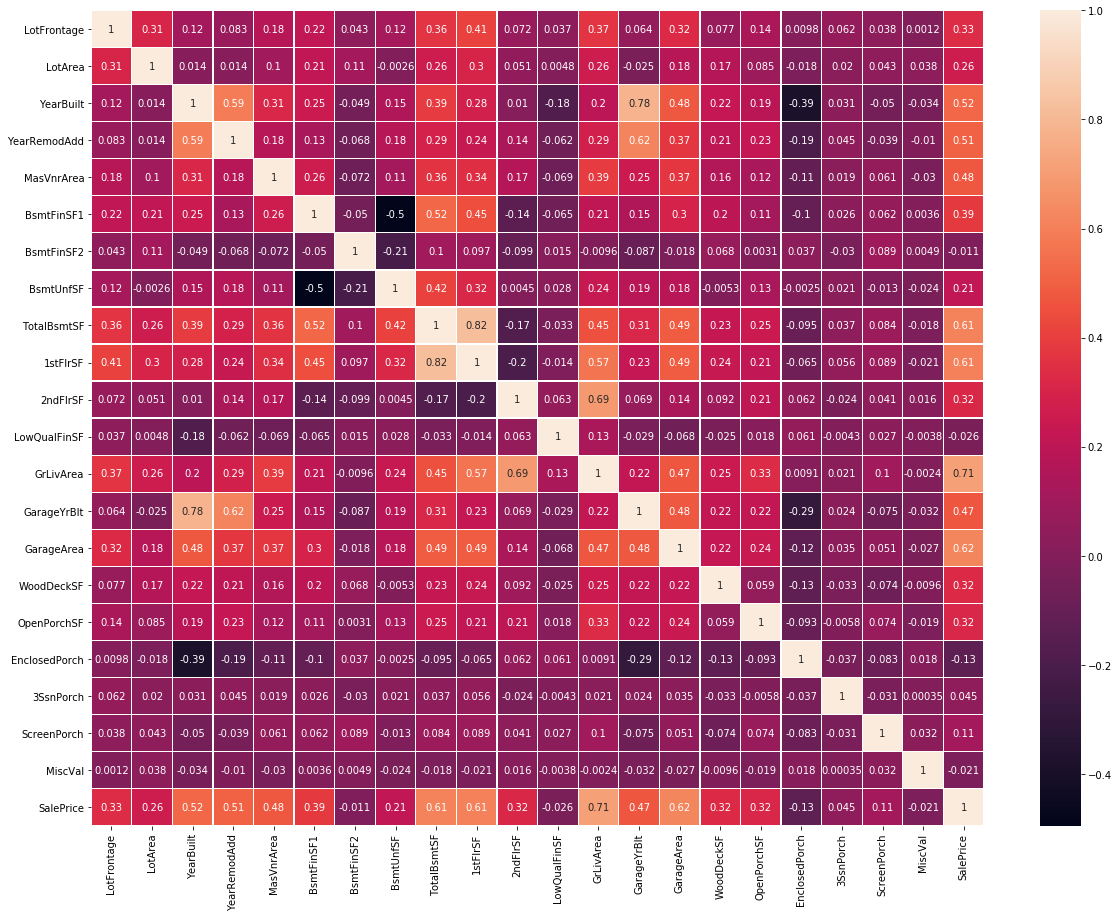

In [15]:
plt.figure(figsize=(20,15))
sns.heatmap(df1,annot=True, linewidths=0.3)

In [16]:
data1=data.drop(['LotArea','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal'],axis=1)

In [160]:
# data1=data1.drop(['EnclosedPorch'],axis=1)

In [17]:
cont_feat=num_feat.copy()

In [18]:
remove=['LotArea','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','EnclosedPorch','3SsnPorch','ScreenPorch','MiscVal']
for i in remove:
    cont_feat.remove(i)

In [19]:
len(cont_feat)

14

In [20]:
len(num_feat)

22

In [ ]:
# data1=data.drop(['MSSubClass','LotArea','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','HalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold','GarageCars','GarageYrBlt','TotRmsAbvGrd','2ndFlrSF'],axis=1)

In [21]:
cat_feat=[j for j in data1.columns if data1[j].dtype=="object"]
cat_feat
len(cat_feat)

43

In [22]:
for feat in dis_feat:
    cat_feat.append(feat)

In [23]:
len(cat_feat)

58

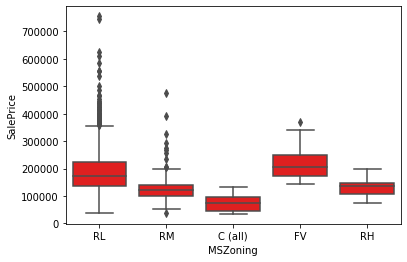

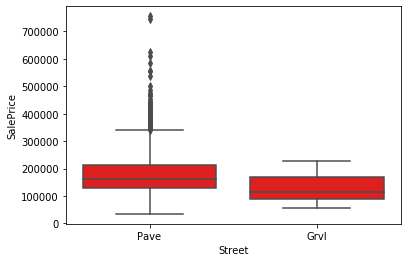

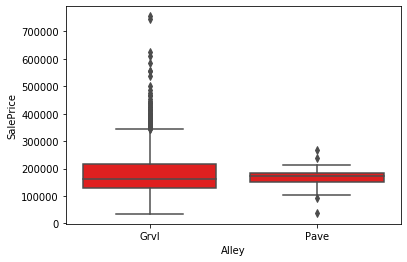

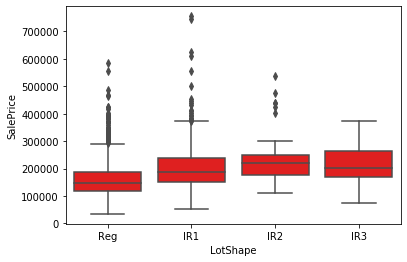

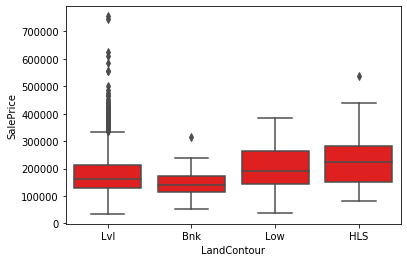

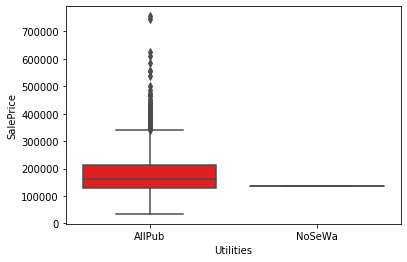

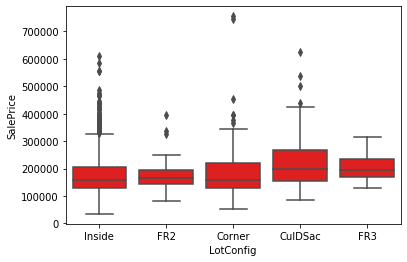

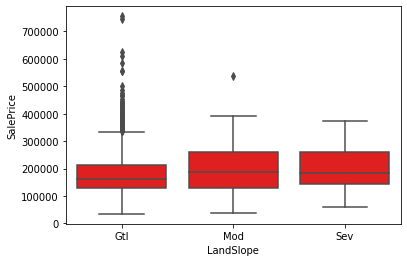

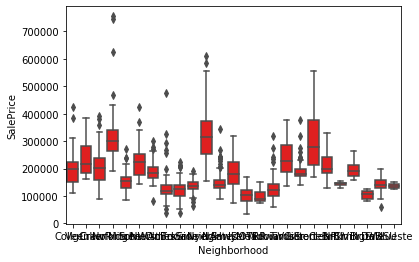

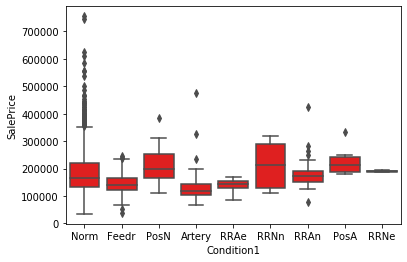

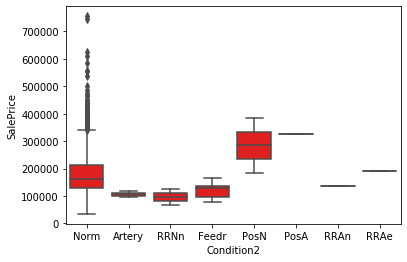

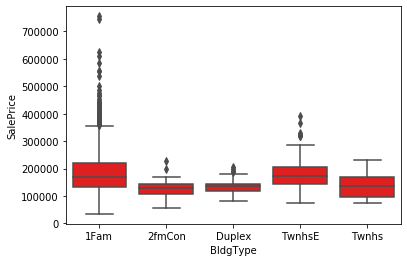

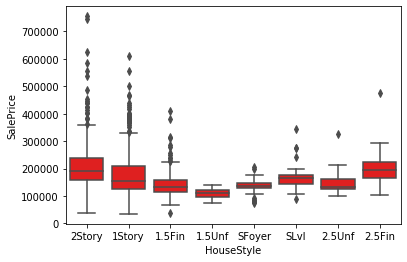

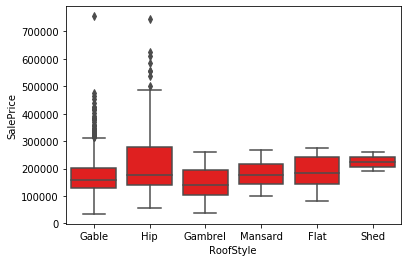

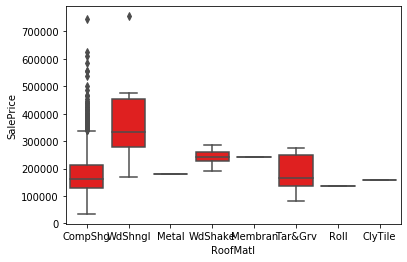

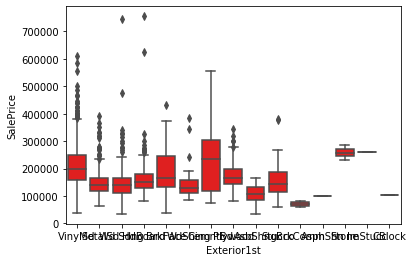

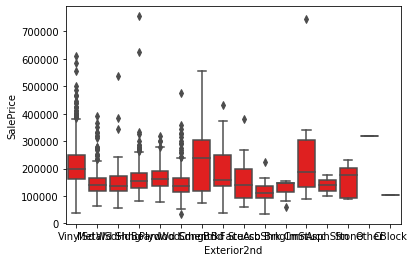

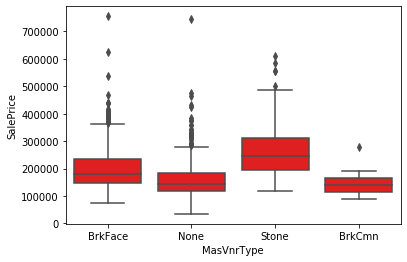

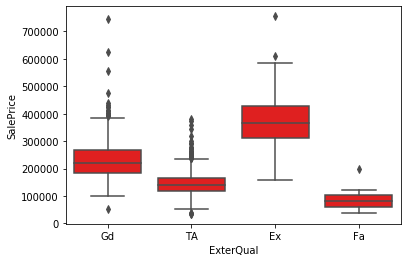

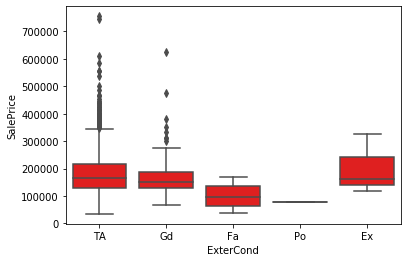

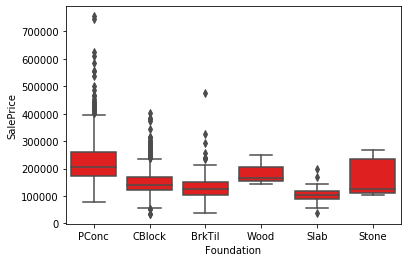

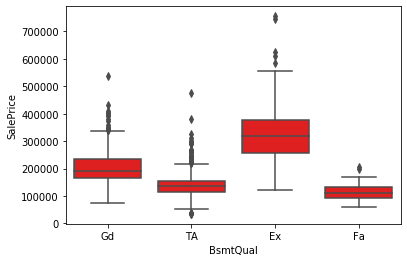

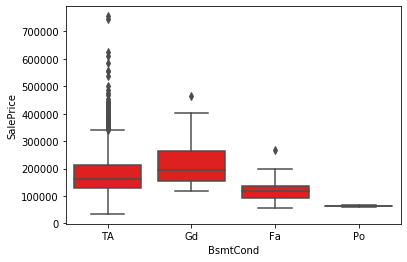

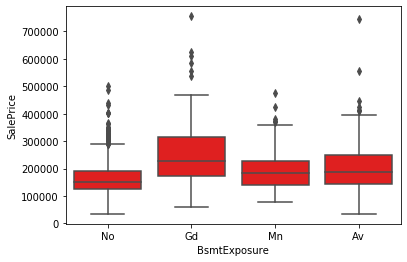

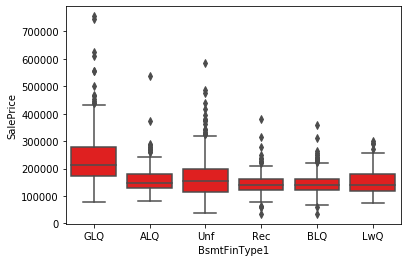

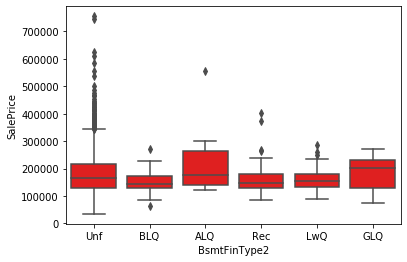

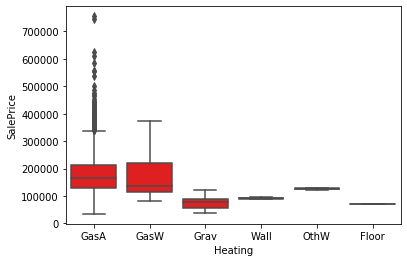

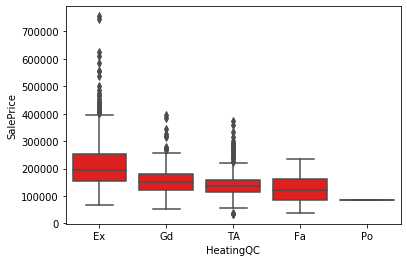

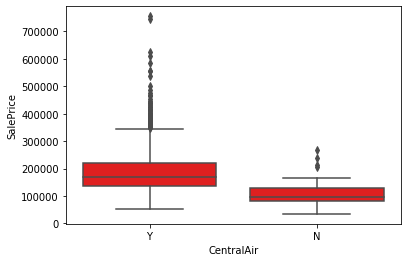

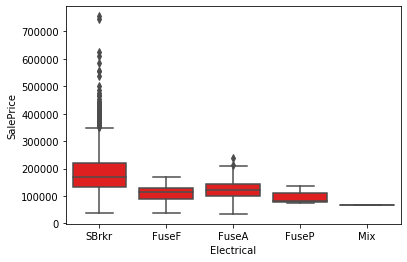

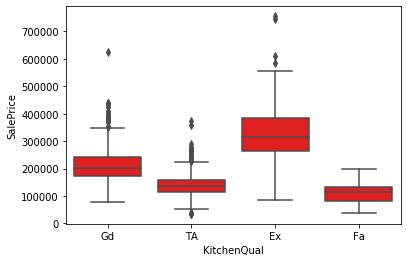

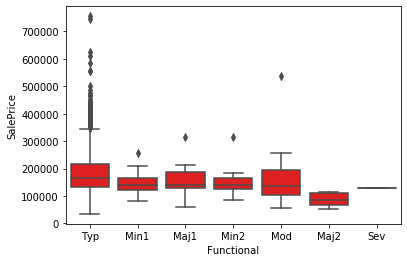

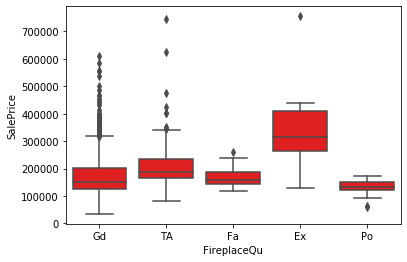

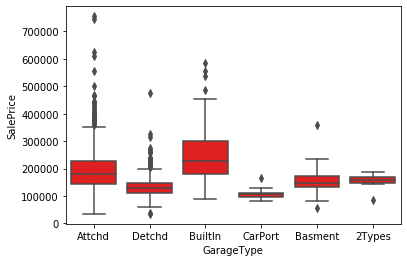

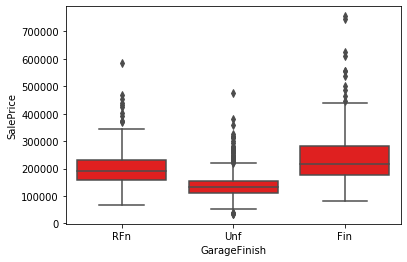

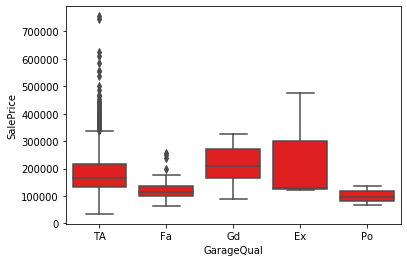

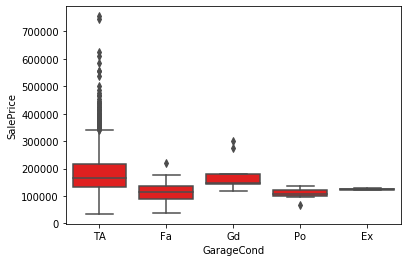

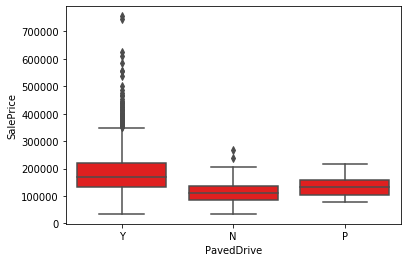

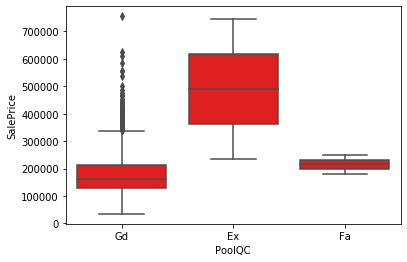

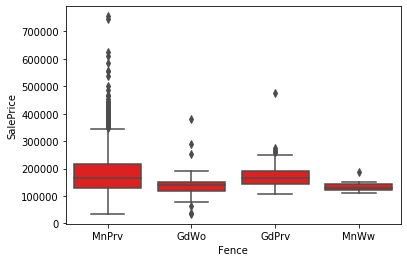

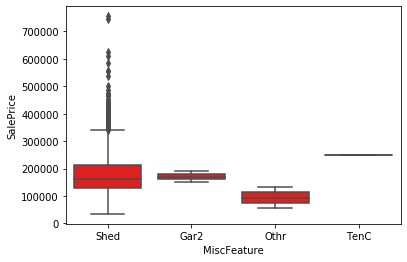

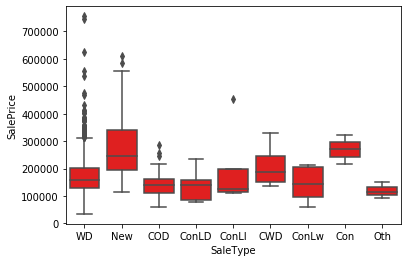

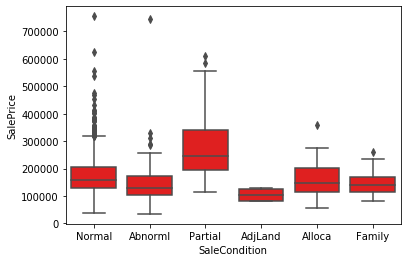

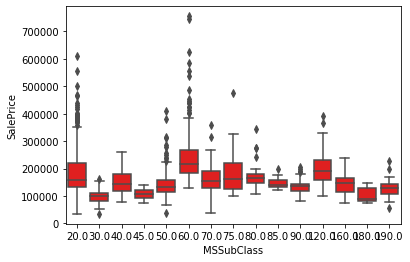

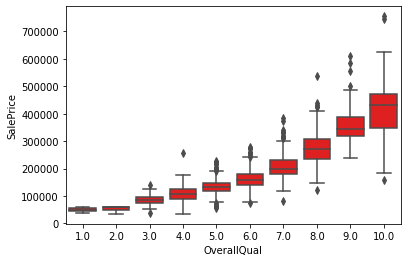

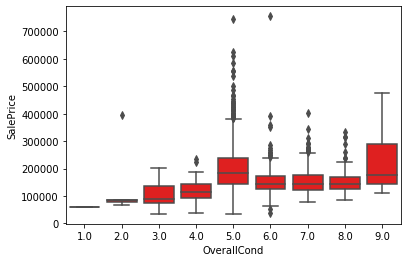

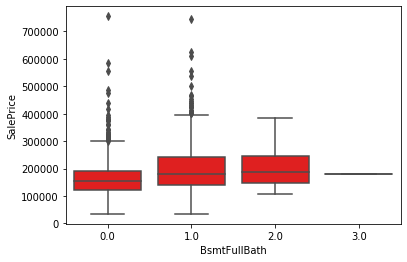

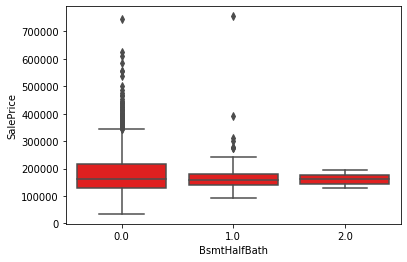

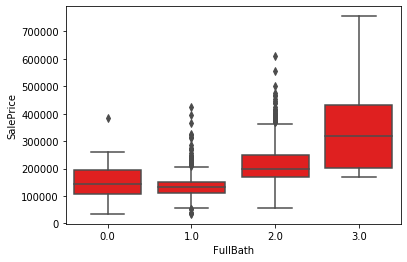

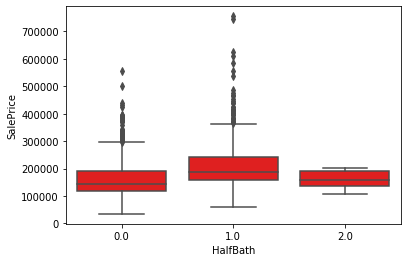

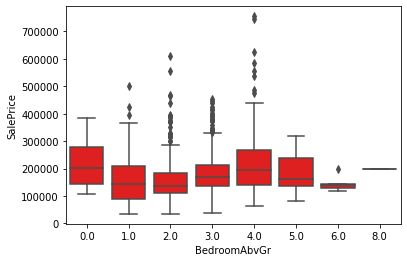

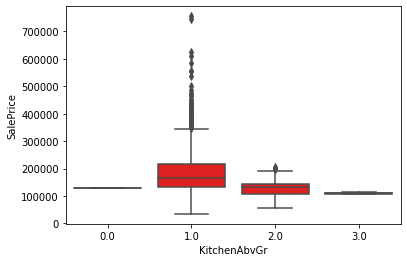

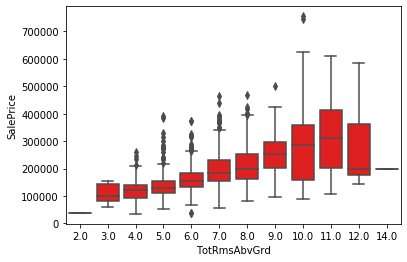

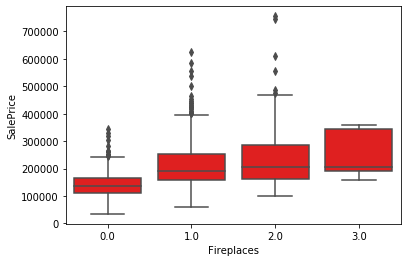

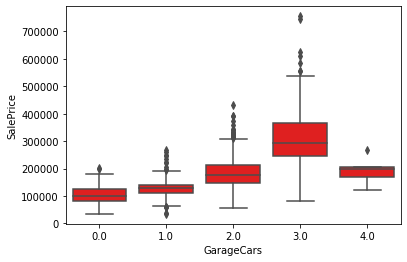

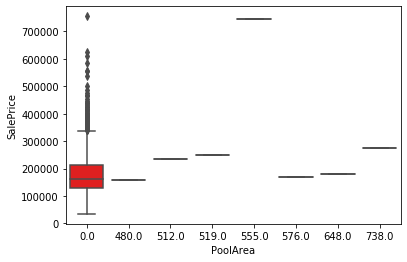

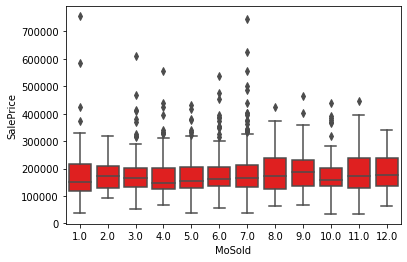

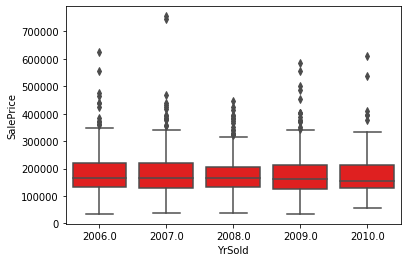

In [24]:
for i in cat_feat:
    sns.boxplot(data1[i],data1['SalePrice'],color='red')
    plt.xlabel(i)
    plt.title
    plt.show()

## Visualizing ioutliers using Scatter plot for numerical variables

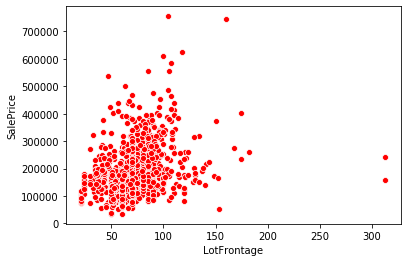

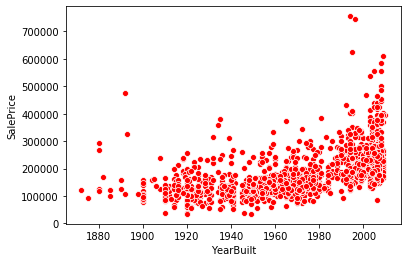

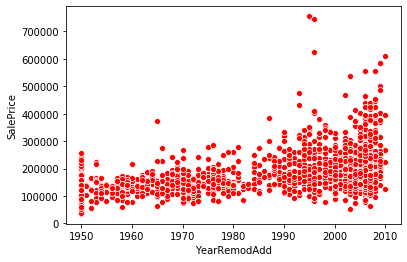

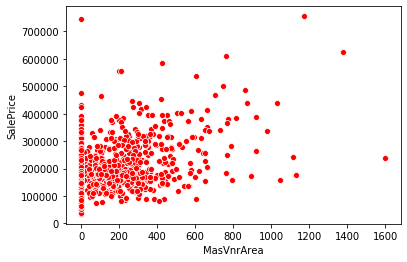

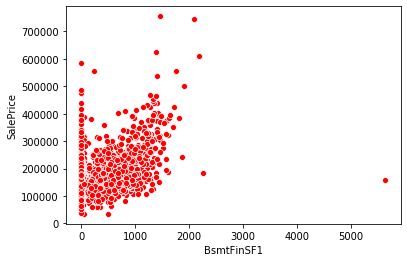

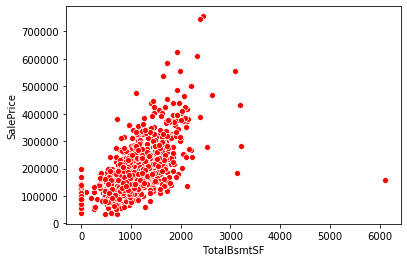

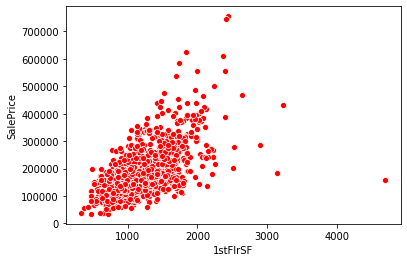

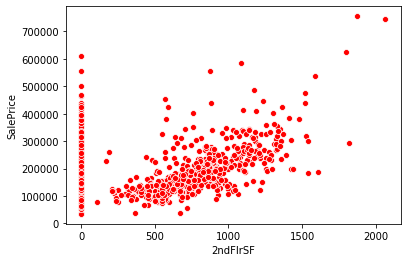

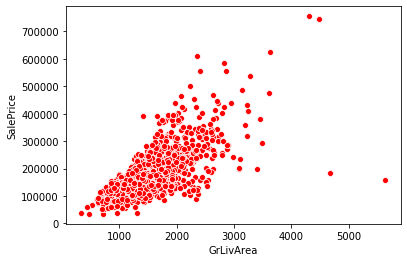

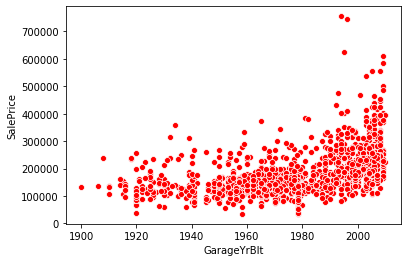

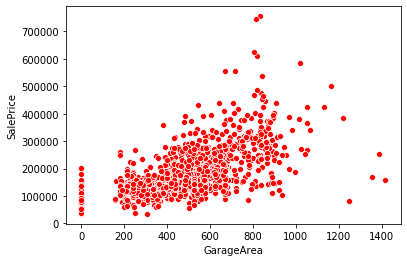

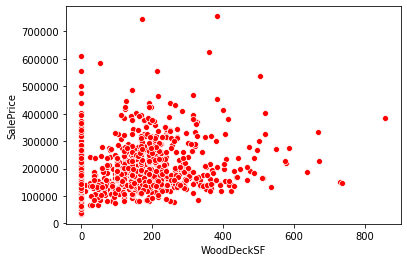

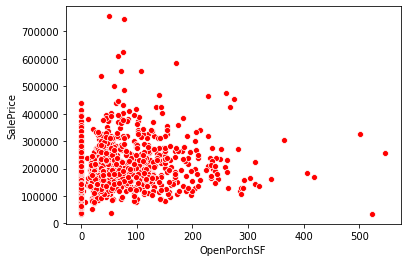

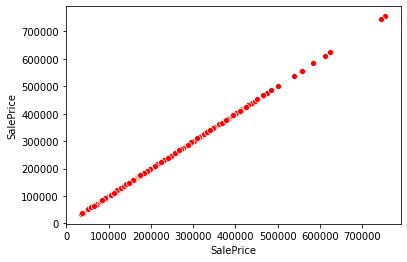

In [163]:
for i in cont_feat:
    sns.scatterplot(data1[i],data1['SalePrice'],color='red')
    plt.title
    plt.show()

## Visualizing outliers using box plot 
## Removing outliers

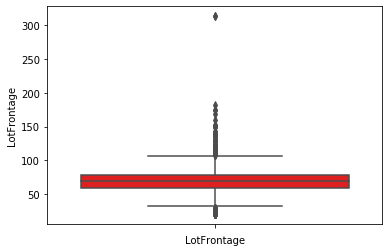

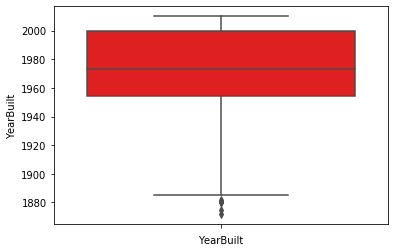

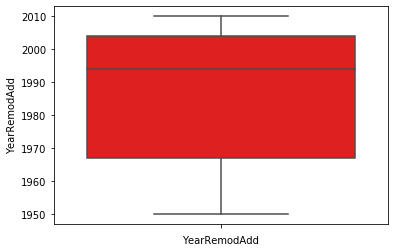

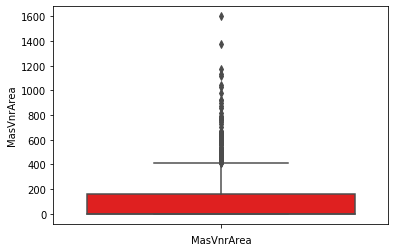

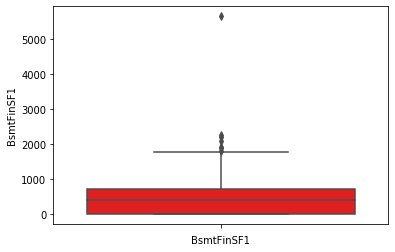

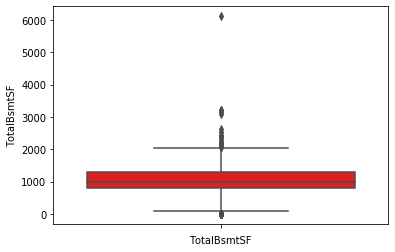

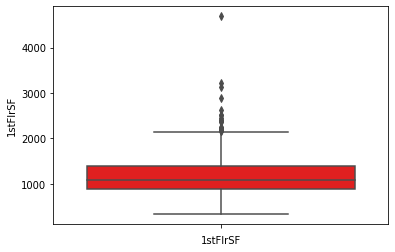

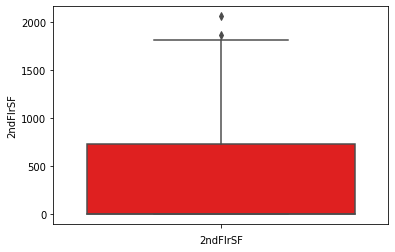

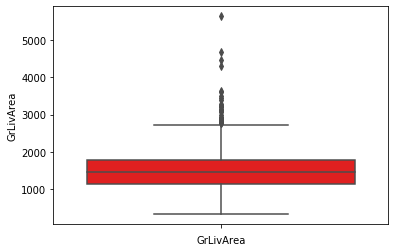

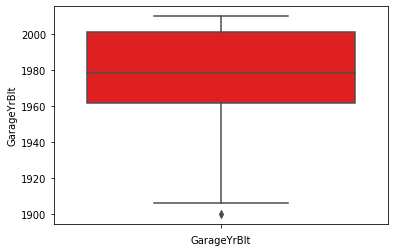

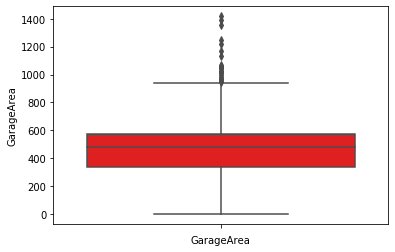

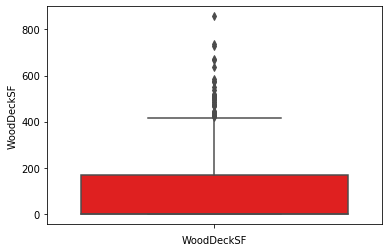

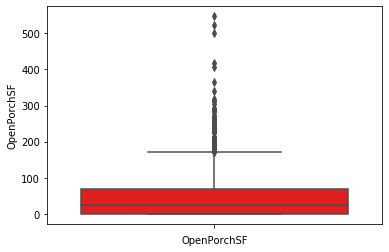

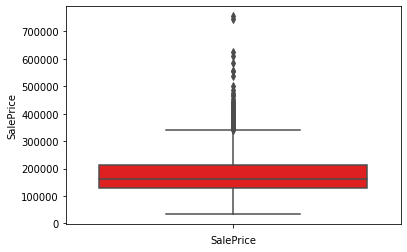

In [25]:
for i in cont_feat:
    sns.boxplot(data1[i],color='red',orient='v')
    plt.xlabel(i)
    plt.title
    plt.show()

In [26]:
data1=data1.drop(data1.loc[data1['LotFrontage']>300].index,axis='index')

data1=data1.drop(data1.loc[data1['MasVnrArea']>1200].index,axis='index')
data1=data1.drop(data1.loc[data1['BsmtFinSF1']>5000].index,axis='index')
data1=data1.drop(data1.loc[data1['TotalBsmtSF']>6000].index,axis='index')
data1=data1.drop(data1.loc[data1['1stFlrSF']>4000].index,axis='index')
data1=data1.drop(data1.loc[data1['GrLivArea']>4500].index,axis='index')
data1=data1.drop(data1.loc[data1['GarageArea']>1200].index,axis='index')
data1=data1.drop(data1.loc[data1['OpenPorchSF']>400].index,axis='index')
len(data1.index)

1447

## Visualizing the distribution

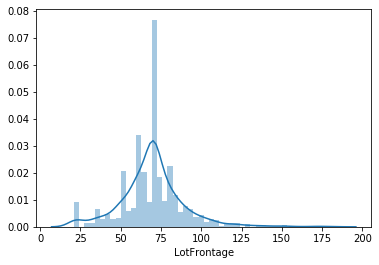

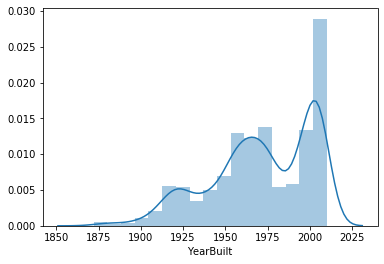

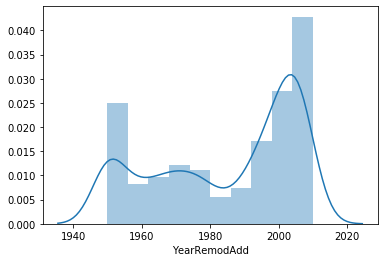

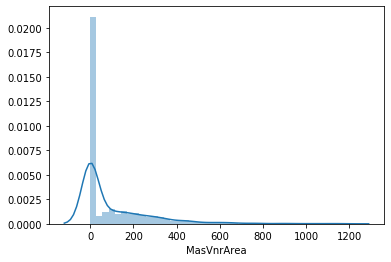

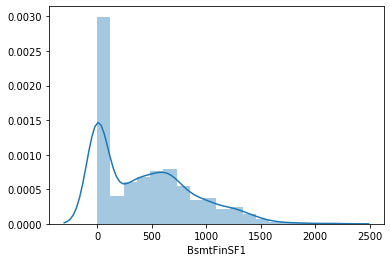

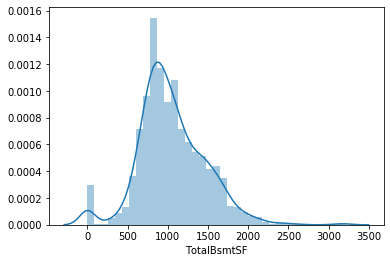

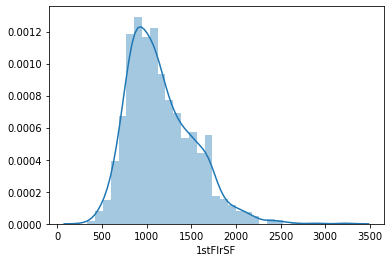

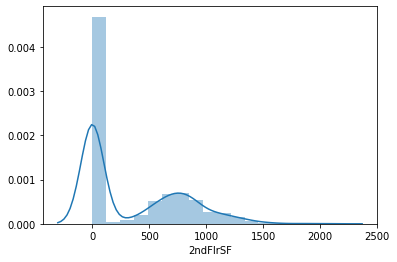

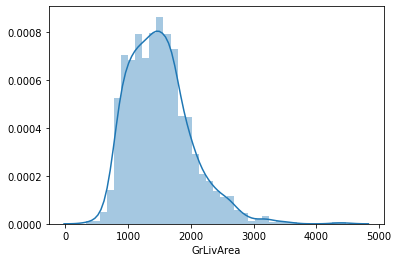

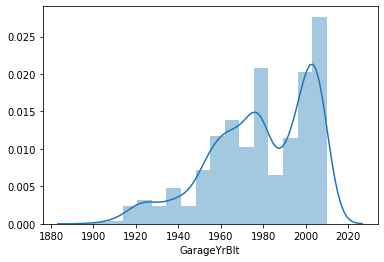

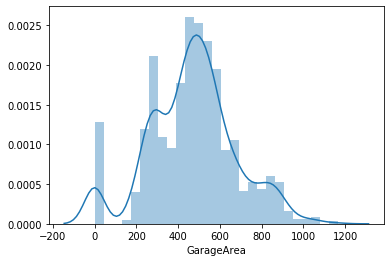

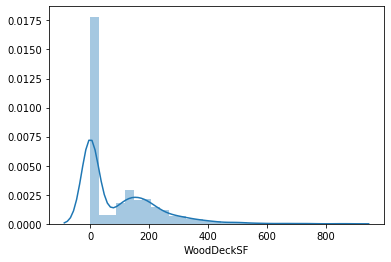

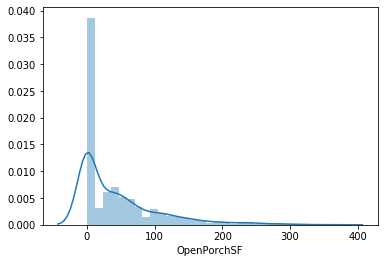

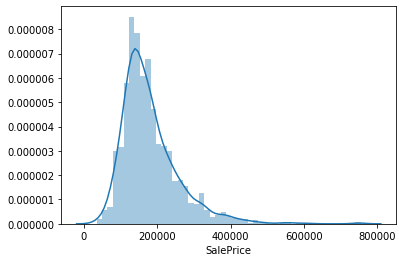

In [27]:
for feat in cont_feat:
    sns.distplot(data1[feat])
    plt.show()

## Feature Scaling
## Minmax scaling

In [36]:
data_scaled=data1.copy()

In [94]:
data_norm=data1.copy()

In [38]:
type(data_scaled)

pandas.core.frame.DataFrame

In [ ]:
 'YearBuilt'
 'YearRemodAdd'

In [29]:
###Removing the year data from list of continuous variable
cont_feat.remove('YearBuilt')
cont_feat.remove('YearRemodAdd')

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data_scaled[cont_feat]=scaler.fit_transform(data_scaled[cont_feat])

In [95]:
from sklearn import preprocessing
data_norm[cont_feat]= preprocessing.normalize(data_norm[cont_feat])

In [96]:
data_norm[cont_feat]

LotFrontage  MasVnrArea  BsmtFinSF1  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0        0.000312    0.000940    0.003386     0.004105  0.004105  0.004095   
1        0.000441    0.000000    0.005388     0.006952  0.006952  0.000000   
2        0.000304    0.000725    0.002174     0.004116  0.004116  0.003874   
3        0.000428    0.000000    0.001542     0.005399  0.006863  0.005399   
4        0.000336    0.001400    0.002620     0.004579  0.004579  0.004212   
...           ...         ...         ...          ...       ...       ...   
1455     0.000354    0.000000    0.000000     0.005445  0.005445  0.003965   
1456     0.000405    0.000567    0.003761     0.007342  0.009870  0.000000   
1457     0.000248    0.000000    0.001032     0.004322  0.004457  0.004322   
1458     0.000478    0.000000    0.000345     0.007583  0.007583  0.000000   
1459     0.000508    0.000000    0.005626     0.008513  0.008513  0.000000   

      GrLivArea  GarageYrBlt  GarageArea  WoodDeckSF  OpenPorchSF  SalePrice  
0      0.008200     0.009606    0.002628    0.000000     0.000293   0.999885  
1      0.006952     0.010885    0.002534    0.001642     0.000000   0.999849  
2      0.007990     0.008952    0.002720    0.000000     0.000188   0.999897  
3      0.012261     0.014268    0.004585    0.000000     0.000250   0.999758  
4      0.008791     0.007999    0.003344    0.000768     0.000336   0.999889  
...         ...          ...         ...         ...          ...        ...  
1455   0.009410     0.011421    0.002628    0.000000     0.000229   0.999849  
1456   0.009870     0.009417    0.002381    0.001662     0.000000   0.999820  
1457   0.008780     0.007283    0.000946    0.000000     0.000225   0.999905  
1458   0.007583     0.013718    0.001688    0.002575     0.000000   0.999815  
1459   0.008513     0.013319    0.001871    0.004989     0.000461   0.999772  

[1447 rows x 12 columns]

In [97]:
data_norm

LotFrontage  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        0.000312     2003.0        2003.0    0.000940    0.003386   
1        0.000441     1976.0        1976.0    0.000000    0.005388   
2        0.000304     2001.0        2002.0    0.000725    0.002174   
3        0.000428     1915.0        1970.0    0.000000    0.001542   
4        0.000336     2000.0        2000.0    0.001400    0.002620   
...           ...        ...           ...         ...         ...   
1455     0.000354     1999.0        2000.0    0.000000    0.000000   
1456     0.000405     1978.0        1988.0    0.000567    0.003761   
1457     0.000248     1941.0        2006.0    0.000000    0.001032   
1458     0.000478     1950.0        1996.0    0.000000    0.000345   
1459     0.000508     1965.0        1965.0    0.000000    0.005626   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  ...  \
0        0.004105  0.004105  0.004095   0.008200     0.009606  ...   
1        0.006952  0.006952  0.000000   0.006952     0.010885  ...   
2        0.004116  0.004116  0.003874   0.007990     0.008952  ...   
3        0.005399  0.006863  0.005399   0.012261     0.014268  ...   
4        0.004579  0.004579  0.004212   0.008791     0.007999  ...   
...           ...       ...       ...        ...          ...  ...   
1455     0.005445  0.005445  0.003965   0.009410     0.011421  ...   
1456     0.007342  0.009870  0.000000   0.009870     0.009417  ...   
1457     0.004322  0.004457  0.004322   0.008780     0.007283  ...   
1458     0.007583  0.007583  0.000000   0.007583     0.013718  ...   
1459     0.008513  0.008513  0.000000   0.008513     0.013319  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0               0             0             0            1   
1                  0               0             0             0            1   
2                  0               0             0             0            1   
3                  0               0             0             0            1   
4                  0               0             0             0            1   
...              ...             ...           ...           ...          ...   
1455               0               0             0             0            1   
1456               0               0             0             0            1   
1457               0               0             0             0            1   
1458               0               0             0             0            1   
1459               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456                     1        

In [40]:
data_scaled

LotFrontage  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0        0.273292     2003.0        2003.0    0.167521    0.322669   
1        0.366460     1976.0        1976.0    0.000000    0.446984   
2        0.291925     2001.0        2002.0    0.138462    0.222121   
3        0.242236     1915.0        1970.0    0.000000    0.098720   
4        0.391304     2000.0        2000.0    0.299145    0.299360   
...           ...        ...           ...         ...         ...   
1455     0.254658     1999.0        2000.0    0.000000    0.000000   
1456     0.397516     1978.0        1988.0    0.101709    0.361060   
1457     0.279503     1941.0        2006.0    0.000000    0.125686   
1458     0.291925     1950.0        1996.0    0.000000    0.022395   
1459     0.335404     1965.0        1965.0    0.000000    0.379342   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  ...  \
0        0.266999  0.180373  0.413559   0.332207     0.936364  ...   
1        0.393637  0.320663  0.000000   0.224046     0.690909  ...   
2        0.286962  0.202488  0.419370   0.350555     0.918182  ...   
3        0.235808  0.216655  0.366102   0.333897     0.890909  ...   
4        0.357143  0.280235  0.509927   0.450024     0.909091  ...   
...           ...       ...       ...        ...          ...  ...   
1455     0.297255  0.213891  0.336077   0.316997     0.900000  ...   
1456     0.480973  0.600898  0.000000   0.419845     0.709091  ...   
1457     0.359326  0.295093  0.557869   0.484307     0.372727  ...   
1458     0.336245  0.257084  0.000000   0.179623     0.454545  ...   
1459     0.391765  0.318590  0.000000   0.222598     0.590909  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0               0             0             0            1   
1                  0               0             0             0            1   
2                  0               0             0             0            1   
3                  0               0             0             0            1   
4                  0               0             0             0            1   
...              ...             ...           ...           ...          ...   
1455               0               0             0             0            1   
1456               0               0             0             0            1   
1457               0               0             0             0            1   
1458               0               0             0             0            1   
1459               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456                     1        

In [41]:
data1

LotFrontage  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     2003.0        2003.0       196.0       706.0   
1            80.0     1976.0        1976.0         0.0       978.0   
2            68.0     2001.0        2002.0       162.0       486.0   
3            60.0     1915.0        1970.0         0.0       216.0   
4            84.0     2000.0        2000.0       350.0       655.0   
...           ...        ...           ...         ...         ...   
1455         62.0     1999.0        2000.0         0.0         0.0   
1456         85.0     1978.0        1988.0       119.0       790.0   
1457         66.0     1941.0        2006.0         0.0       275.0   
1458         68.0     1950.0        1996.0         0.0        49.0   
1459         75.0     1965.0        1965.0         0.0       830.0   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageYrBlt  ...  \
0           856.0     856.0     854.0     1710.0       2003.0  ...   
1          1262.0    1262.0       0.0     1262.0       1976.0  ...   
2           920.0     920.0     866.0     1786.0       2001.0  ...   
3           756.0     961.0     756.0     1717.0       1998.0  ...   
4          1145.0    1145.0    1053.0     2198.0       2000.0  ...   
...           ...       ...       ...        ...          ...  ...   
1455        953.0     953.0     694.0     1647.0       1999.0  ...   
1456       1542.0    2073.0       0.0     2073.0       1978.0  ...   
1457       1152.0    1188.0    1152.0     2340.0       1941.0  ...   
1458       1078.0    1078.0       0.0     1078.0       1950.0  ...   
1459       1256.0    1256.0       0.0     1256.0       1965.0  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0               0             0             0            1   
1                  0               0             0             0            1   
2                  0               0             0             0            1   
3                  0               0             0             0            1   
4                  0               0             0             0            1   
...              ...             ...           ...           ...          ...   
1455               0               0             0             0            1   
1456               0               0             0             0            1   
1457               0               0             0             0            1   
1458               0               0             0             0            1   
1459               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456                     1        

## BoxPlot

In [52]:
# for i in cat_feat:
#     sns.boxplot(data1[i],data1['SalePrice'],color='red')
#     plt.xlabel(i)
#     plt.title
#     plt.show()

## Converting categorical variable into Numerical form using pandas-Get dummies

In [35]:
dummies=pd.get_dummies(data1[cat_feat],drop_first=True)
data1=data1.drop(cat_feat,1)
data1=pd.concat([data1,dummies],1)

In [198]:
x=data1.drop('SalePrice',1)
y=data1['SalePrice']

In [196]:
x1=data_scaled.drop('SalePrice',1)
y1=data_scaled['SalePrice']

In [197]:
x2=data_norm.drop('SalePrice',1)
y2=data_norm['SalePrice']

## Train_test_split

In [199]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=50)

In [200]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=50)

In [201]:
from sklearn.model_selection import train_test_split
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=50)

## Linear Regression

In [166]:
#applying linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
#predicting the test set result
y_pred=regressor.predict(x_test)
regressor.score(x_test,y_test)
# regressor.score(x_train,y_train)

0.9088728152737422

In [167]:
regressor.score(x_train,y_train)

0.9390428649991331

In [169]:
#applying linear regression model
from sklearn.linear_model import LinearRegression
regressor1=LinearRegression()
regressor1.fit(x1_train,y1_train)
#predicting the test set result
y_pred=regressor1.predict(x1_test)
regressor1.score(x1_test,y1_test)
# regressor.score(x_train,y_train)

0.9088728152737422

In [170]:
regressor1.score(x1_train,y1_train)

0.9390428649991331

In [171]:
#applying linear regression model
from sklearn.linear_model import LinearRegression
regressor2=LinearRegression()
regressor2.fit(x2_train,y2_train)
#predicting the test set result
y_pred=regressor2.predict(x2_test)
regressor2.score(x2_test,y2_test)
# regressor.score(x_train,y_train)

0.9316428449231575

In [172]:
regressor2.score(x2_train,y2_train)

0.9734181649717809

## Model Coefficient

In [21]:
# coef1=pd.Series(regressor.coef_)
# plt.figure(figsize=(30,30))
# coef1.plot(kind='bar', title='Model Coefficients')

## Ridge

In [374]:
#applying linear regression model
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=10,random_state=0)

In [ ]:
ridge.fit(x_train,y_train)
#predicting the test set result
y_pred=ridge.predict(x_test)
ridge.score(x_test,y_test)
# ridge.score(x_train,y_train)

In [375]:
## cross validation

In [378]:
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
    x_train, x_test=x.iloc[train_index], x.iloc[test_index]
    y_train, y_test=y.iloc[train_index], y.iloc[test_index]
    ridge.fit(x_train,y_train)
    score=ridge.score(x_test,y_test)
    
    acc.append(score)

C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


In [379]:
acc

[0.8897861605685493,
 0.9212331299036286,
 0.8948351904465568,
 0.896504754457541,
 0.9067584712204159,
 0.8826327749866291,
 0.9265563816199733,
 0.8964153217216698,
 0.9283332818504005,
 0.9092806783477483]

In [380]:
acc=np.array(acc)

In [381]:
print('maximum score:',acc.max())
print('minimum score:',acc.min())
print('average score:',acc.mean())

maximum score: 0.9283332818504005
minimum score: 0.8826327749866291
average score: 0.9052336145123112


In [173]:
#applying linear regression model
from sklearn.linear_model import Ridge
ridge1=Ridge(alpha=10,random_state=0)
ridge1.fit(x1_train,y1_train)
#predicting the test set result
y_pred=ridge1.predict(x1_test)
ridge1.score(x1_test,y1_test)

0.9092806783477483

In [174]:
ridge1.score(x1_train,y1_train)

0.9299575255845349

In [202]:
#applying linear regression model
from sklearn.linear_model import Ridge
ridge2=Ridge(alpha=10,random_state=0)
ridge2.fit(x2_train,y2_train)
#predicting the test set result
y_pred=ridge2.predict(x2_test)
ridge2.score(x2_test,y2_test)

0.5834096833198309

## lasso

In [373]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=80)

In [203]:
lasso.fit(x_train,y_train)
lasso.score(x_test,y_test)

C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16464979137.4281, tolerance: 710745685.825676
  positive)


0.9169691245924296

In [215]:
# from sklearn.linear_model import Lasso
# lasso=Lasso(alpha=120,random_state=0)
# lasso.fit(x2_train,y2_train)
# y_pred1=lasso.predict(x2_test)
# # lasso.score(x_train,y_train)
# lasso.score(x2_test,y2_test)

In [119]:
# from sklearn import metrics
# print("Accuracy = ", 1 - metrics.r2_score(y_test,y_pred1))

##  Cross Validation on lasso regression to avoid train_test_split
## 1. K-fold 

In [204]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(lasso,x,y,cv=10)
score

C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 96361535694.04486, tolerance: 796524353.6585752
  positive)


array([0.90565901, 0.91089241, 0.9254754 , 0.93119481, 0.90551448,
       0.89122628, 0.90305028, 0.89973172, 0.89893005, 0.9077336 ])

In [205]:
print('maximum score:',score.max())
print('minimum score:',score.min())
print('average score:',score.mean())

maximum score: 0.9311948081086922
minimum score: 0.8912262845220963
average score: 0.9079408043067007


In [115]:
# from sklearn.model_selection import cross_val_score
# score=cross_val_score(lasso,x1,y1,cv=10)
# score

array([-0.0082106 , -0.01314425, -0.00188557, -0.0001558 , -0.00510722,
       -0.00017245, -0.01434227, -0.01029432, -0.004967  , -0.00561782])

In [116]:
# print('maximum score:',score.max())
# print('minimum score:',score.min())
# print('average score:',score.mean())

maximum score: -0.0001557979619719596
minimum score: -0.014342267577191592
average score: -0.006389730466171484


## Stratified Cross Valiodation on lasso regression

In [369]:
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
    x_train, x_test=x.iloc[train_index], x.iloc[test_index]
    y_train, y_test=y.iloc[train_index], y.iloc[test_index]
    lasso.fit(x_train,y_train)
    score=lasso.score(x_test,y_test)
    
    acc.append(score)

C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240956928682.4842, tolerance: 822867277.4743227
  positive)
C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 244695054230.11325, tolerance: 798640297.2195473
  positive)
C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase

In [370]:
acc

[0.8068006044507278,
 0.917607793322591,
 0.8656483183233348,
 0.8680846083132289,
 0.8221523865050563,
 0.8849906910986114,
 0.9215150589182655,
 0.8867608680726828,
 0.919415353009255,
 0.9088122859864928]

In [371]:
acc=np.array(acc)

In [372]:
print('maximum score:',acc.max())
print('minimum score:',acc.min())
print('average score:',acc.mean())

maximum score: 0.9215150589182655
minimum score: 0.8068006044507278
average score: 0.8801787968000246


## Random forest Regressor

In [322]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor=RandomForestRegressor(n_estimators=100,max_depth=10)

In [297]:
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [298]:
rf_regressor.score(x_test,y_test)

0.8849068314109578

In [69]:
y_pred=rf_regressor.predict(x_test)

In [70]:
from sklearn import metrics
r_square=metrics.r2_score(y_test,y_pred)

In [71]:
r_square

0.901020477261732

In [320]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf_regressor,x,y,cv=10)
score

array([0.85679214, 0.88812536, 0.91176011, 0.92110273, 0.86394885,
       0.88618645, 0.90771529, 0.87000303, 0.88691398, 0.86277329])

In [321]:
print('maximum score:',score.max())
print('minimum score:',score.min())
print('average score:',score.mean())

maximum score: 0.9211027342608378
minimum score: 0.8567921363816617
average score: 0.885532123174672


In [225]:
rf_regressor1=RandomForestRegressor(n_estimators=65, random_state=0)

In [226]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf_regressor1,x1,y1,cv=10)
score

array([0.85989951, 0.87965876, 0.90783174, 0.92282122, 0.86616846,
       0.88612715, 0.90074608, 0.88816373, 0.87350743, 0.85984057])

In [227]:
print('maximum score:',score.max())
print('minimum score:',score.min())
print('average score:',score.mean())

maximum score: 0.9228212171627276
minimum score: 0.8598405655732684
average score: 0.8844764636908163


In [228]:
rf_regressor2=RandomForestRegressor(n_estimators=65, random_state=0)

In [229]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf_regressor2,x2,y2,cv=10)
score

array([-0.00247821, -0.03845712, -0.00046144, -0.00229095, -0.00341021,
       -0.02847053, -0.0122125 , -0.00024931, -0.02627729, -0.00793336])

## XGboost Regressor

In [230]:
import xgboost as xgb

In [291]:
xgb_reg = xgb.XGBRegressor(objective ='reg:linear',
                max_depth =7, n_estimators = 300,learning_rate=0.25)

In [279]:
xgb_reg.fit(x_train, y_train)

[13:27:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.25, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [280]:
xgb_reg.score(x_test,y_test)

0.9010103730740061

#### Using minmax Scaled data

In [238]:
xgb_reg1 = xgb.XGBRegressor(objective ='reg:linear',
                max_depth = 5, n_estimators = 10)

In [239]:
xgb_reg1.fit(x1_train, y1_train)

[11:11:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [240]:
xgb_reg1.score(x1_test,y1_test)

0.8930098962465269

#### Using mean normalized data

In [241]:
xgb_reg2 = xgb.XGBRegressor(objective ='reg:linear',
                max_depth = 5, n_estimators = 10)

In [242]:
xgb_reg2.fit(x2_train, y2_train)

[11:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=4, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [243]:
xgb_reg2.score(x2_test,y2_test)

-9470.094135926696

### cross validation

##### Stratified k-fold cv

In [292]:
from sklearn.model_selection import StratifiedKFold
acc=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(x,y)
for train_index, test_index in skf.split(x,y):
    x_train, x_test=x.iloc[train_index], x.iloc[test_index]
    y_train, y_test=y.iloc[train_index], y.iloc[test_index]
    xgb_reg.fit(x_train,y_train)
    score=xgb_reg.score(x_test,y_test)
    
    acc.append(score)

C:\Users\SUMIT GAURAV\Anaconda3\envs\channi\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


[13:32:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[13:32:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:17

In [293]:
acc

[0.9000585924900709,
 0.9093282618516921,
 0.9004195553202727,
 0.8613095378525053,
 0.8898640200648956,
 0.8642292129909607,
 0.9157196476547103,
 0.8591739042178121,
 0.8692360814733523,
 0.9045821999527193]

In [294]:
acc=np.array(acc)

In [295]:
print('maximum score:',acc.max())
print('minimum score:',acc.min())
print('average score:',acc.mean())

maximum score: 0.9157196476547103
minimum score: 0.8591739042178121
average score: 0.8873921013868993


#### using minmax scaled data

In [244]:
from sklearn.model_selection import cross_val_score
score1=cross_val_score(xgb_reg1,x1,y1,cv=10)
score1

[11:13:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:13:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:13:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:13:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[11:13:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:17

array([0.84674617, 0.88206634, 0.90248479, 0.90038369, 0.86319328,
       0.85550808, 0.88913387, 0.88886221, 0.87687542, 0.83360518])

In [246]:
print('maximum score:',score1.max())
print('minimum score:',score1.min())
print('average score:',score1.mean())

maximum score: 0.902484789436196
minimum score: 0.8336051801332652
average score: 0.8738859022999723


## Model selection and HyperPARAMETER Tuning using GridSearchCV on SVM, Linear, Lasso and Ridge Regression

In [262]:
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
"n_estimators":[5,10,15,20],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

In [259]:
from sklearn.model_selection import GridSearchCV

In [266]:
xgb_reg3=GridSearchCV(xgb.XGBRegressor(objective ='reg:linear'),param_grid=params,n_jobs=-1,cv=5,verbose=3)

In [267]:
xgb_reg3.fit(x_train, y_train)

Fitting 5 folds for each of 15360 candidates, totalling 76800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

[13:21:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estima...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             iid='deprecated', n_jobs=-1,
             param_grid={'colsample_bytree': [0.3, 0.4, 0.5, 0.7],
                         'gamma': [0.0, 0.1, 0.2, 

In [269]:
xgb_reg3.cv_results_

{'mean_fit_time': array([0.47918739, 0.1374321 , 0.1509954 , ..., 0.34387913, 0.52120519,
        0.64367666]),
 'std_fit_time': array([0.1826006 , 0.01220504, 0.00474444, ..., 0.00788798, 0.00401902,
        0.09398109]),
 'mean_score_time': array([0.01615763, 0.01535912, 0.01615896, ..., 0.01476231, 0.01436238,
        0.01695528]),
 'std_score_time': array([0.00074674, 0.00079849, 0.00183067, ..., 0.00074658, 0.00048829,
        0.00141057]),
 'param_colsample_bytree': masked_array(data=[0.3, 0.3, 0.3, ..., 0.7, 0.7, 0.7],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.0, 0.0, 0.0, ..., 0.4, 0.4, 0.4],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.05, ..., 0.3, 0.3, 0.3],
              mask=[False, False, False, ..., False, False, False],
       

In [271]:
df=pd.DataFrame(xgb_reg3.cv_results_)

In [272]:
df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.479187      0.182601         0.016158        0.000747   
1           0.137432      0.012205         0.015359        0.000798   
2           0.150995      0.004744         0.016159        0.001831   
3           0.185702      0.002475         0.016159        0.001163   
4           0.094946      0.007657         0.016560        0.001354   
...              ...           ...              ...             ...   
15355       0.736628      0.046011         0.014761        0.000747   
15356       0.155782      0.009236         0.015957        0.001411   
15357       0.343879      0.007888         0.014762        0.000747   
15358       0.521205      0.004019         0.014362        0.000488   
15359       0.643677      0.093981         0.016955        0.001411   

      param_colsample_bytree param_gamma param_learning_rate param_max_depth  \
0                        0.3           0                0.05               3   
1                        0.3           0                0.05               3   
2                        0.3           0                0.05               3   
3                        0.3           0                0.05               3   
4                        0.3           0                0.05               3   
...                      ...         ...                 ...             ...   
15355                    0.7         0.4                 0.3              15   
15356                    0.7         0.4                 0.3              15   
15357                    0.7         0.4                 0.3              15   
15358                    0.7         0.4                 0.3              15   
15359                    0.7         0.4                 0.3              15   

      param_min_child_weight param_n_estimators  \
0                          1                  5   
1                          1                 10   
2                          1                 15   
3                          1                 20   
4                          3                  5   
...                      ...                ...   
15355                      5                 20   
15356                      7                  5   
15357                      7                 10   
15358                      7                 15   
15359                      7                 20   

                                                  params  split0_test_score  \
0      {'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...          -3.334713   
1      {'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...          -1.739596   
2      {'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...          -0.749495   
3      {'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...          -0.145975   
4      {'colsample_bytree': 0.3, 'gamma': 0.0, 'learn...          -3.336712   
...                                                  ...                ...   
15355  {'colsample_bytree': 0.7, 'gamma': 0.4, 'learn...           0.858236   
15356  {'colsample_bytree': 0.7, 'gamma': 0.4, 'learn...           0.647455   
15357  {'colsample_bytree': 0.7, 'gamma': 0.4, 'learn...           0.872699   
15358  {'colsample_bytree': 0.7, 'gamma': 0.4, 'learn...           0.888388   
15359  {'colsample_bytree': 0.7, 'gamma': 0.4, 'learn...           0.889887   

       split1_test_score  split2_test_score  split3_test_score  \
0              -2.890275          -2.449595          -3.577540   
1              -1.456374          -1.253682          -1.833966   
2              -0.579782          -0.493824          -0.772801   
3              -0.035855          -0.012915          -0.130346   
4              -2.887705          -2.449595          -3.575181   
...                  ...                ...                ...   
15355           0.903748           0.889623           0.865618   
15356           0.694779           0.623348           0.660487   
15357           0.907614           0.

In [273]:
xgb_reg3.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.25,
 'max_depth': 15,
 'min_child_weight': 7,
 'n_estimators': 20}

## Best Model slection and hyperparameter tuning

In [ ]:
model_params={
    'lasso':{
        'model': lasso=Lasso(),
        'param':{'alpha' :[0.02,0.024,0.025,0.026,0.03,0.1,0.2,0.5,1,10,20,30,40,50,60,70]}
    }
    'ridge':{
        'model':ridge=Ridge(),
        'param':{'alpha' :[0.02,0.024,0.025,0.026,0.03,0.1,0.2,0.5,1,10,20,30,40,50,60,70,80,90,100,200,300]}
    }
    'rf_regressor':{
        'model' : rf_regressor=RandomForestRegressor(),
        'param':{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
    }
    'xgb_reg':{
        'model': xgb.XGBRegressor(objective ='reg:linear'),
        'param':{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
"n_estimators":[5,10,15,20],
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}
    }
}

In [ ]:
scores=[]
for model_name,mp in model_params.items():
    reg=RandomizedSearchCV(mp['model'],mp['param'],cv=5,n_iter=5)

In [ ]:
reg.fit(x,y)

In [ ]:
scores.append({
    'model': model_name,
    'best_score':reg.best_score_
    'best_params':reg.best_params_
})

In [ ]:
df=pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [ ]:
df